# **Project Name**    - Flipkart Data Analytics & CSAT Score Classification





## **Project Summary**
### Objective
This project aims to classify **Customer Satisfaction Scores (CSAT)** using historical customer support interaction data. CSAT is a critical metric for evaluating service quality and customer experience. By analyzing past interactions, agent behavior, customer remarks, and ticket resolution times, we build a classification model to predict the level of customer satisfaction (1 to 5). This model will help proactively identify areas needing improvement and optimize support workflows.

---

### Dataset Overview
The dataset, `Customer_support_data.csv`, contains multiple entries from a customer support system. Each row represents a unique customer interaction along with metadata such as agent details, time of response, product details, and the final satisfaction score. The goal is to use these features to predict the **`CSAT Score`**, which ranges from 1 (very dissatisfied) to 5 (very satisfied).

---

### Feature-wise Explanation

- **Unique id**: A unique identifier for each customer support ticket. Used for tracking, not used in modeling.  
- **channel_name**: The communication channel used by the customer (e.g., Email, Chat, Phone), which influences response quality and time.  
- **category**: Broad classification of the support issue (e.g., Technical, Billing, Account), useful in understanding issue trends.  
- **Sub-category**: More specific issue label under each category (e.g., "Login Failure" under Technical) to capture granular insights.  
- **Customer Remarks**: Free-text input from customers about their issue; useful for sentiment analysis or NLP-based features.  
- **Order_id**: The ID of the order associated with the issue; may not be directly useful unless joined with order metadata.  
- **order_date_time**: Timestamp of the order; can be used to derive delays or time gaps relative to issue date.  
- **Issue_reported at**: Time when the customer reported the issue; helps calculate response and resolution delays.  
- **issue_responded**: Time when the support agent responded; combined with report time to calculate response duration.  
- **Survey_response_Date**: Date when customer gave the CSAT feedback; useful to understand follow-up timing, but not always predictive.  
- **Customer_City**: The city where the customer resides; can identify location-based trends or systemic issues.  
- **Product_category**: The type of product involved in the support ticket; some product types may result in higher or lower CSAT.  
- **Item_price**: Price of the item involved; higher prices might lead to higher customer expectations and affect satisfaction.  
- **connected_handling_time**: Total time spent by the agent resolving the issue; excessive durations may signal complexity or inefficiency.  
- **Agent_name**: Name of the support agent handling the ticket; can be encoded to understand individual performance impact.  
- **Supervisor**: The agent’s supervisor; useful to analyze team-level trends in CSAT.  
- **Manager**: The manager overseeing the support process; can help identify management-level influence on support quality.  
- **Tenure Bucket**: Agent experience group (e.g., 0–6 months, 6–12 months); more experienced agents might resolve issues better.  
- **Agent Shift**: Time shift during which the case was handled (e.g., Day, Night); night shifts might see different trends in CSAT.  
- **CSAT Score** *(Target Variable)*: Customer satisfaction score (1 to 5); the main variable we aim to classify using other features.

---

### Use Case
This classification model can be used by customer service teams to:
- Flag at-risk tickets likely to receive low CSAT scores.
- Identify factors leading to dissatisfaction.
- Guide training and resource allocation to improve service quality.


## **Data Overview**

**Suppress Warnings**

In [1]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

#### Import Libraries

In [2]:
# Attempt to import necessary libraries and handle import errors

try:
    import pandas as pd  # Data manipulation
    import numpy as np  # Numerical operations
    import matplotlib.pyplot as plt  # Plotting
    import seaborn as sns  # Advanced data visualization
    from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score  # Model selection tools
    from sklearn.preprocessing import LabelEncoder, StandardScaler  # Data preprocessing
    from xgboost import XGBClassifier  # XGBoost model
    from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score  # Evaluation metrics
    print("All libraries imported successfully.")

except ImportError as e:
    print(f"Error importing libraries: {e}")  # Print error if import fails

All libraries imported successfully.


#### Dataset Loading

In [3]:
# Attempt to load the dataset and handle potential errors

try:
    # Load dataset from the specified URL
    df = pd.read_csv('https://raw.githubusercontent.com/AkashBommidi27/Flipkart-Customer-Satisfaction-ML/main/Customer_support_data.csv')
    print("Dataset loaded successfully.")
except Exception as e:
    # Print error message if loading fails
    print(f"Failed to load dataset: {e}")

Dataset loaded successfully.


#### Dataset First View

In [4]:
# Dataset First Look
df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01-08-2023 11:13,01-08-2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01-08-2023 12:52,01-08-2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01-08-2023 20:16,01-08-2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01-08-2023 20:56,01-08-2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01-08-2023 10:30,01-08-2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


#### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
shape = df.shape
print(f"Number of Rows  = {shape[0]}")
print(f"Number of Columns  = {shape[1]}")

Number of Rows  = 85907
Number of Columns  = 20


#### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

#### Dataset Description

In [7]:
# Description of the dataset
df.describe()

,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
print(df.duplicated().sum())

0


#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
Unique id,0
channel_name,0
category,0
Sub-category,0
Customer Remarks,57165
Order_id,18232
order_date_time,68693
Issue_reported at,0
issue_responded,0
Survey_response_Date,0


### Check Unique Values for each variable.

In [10]:
# Using nunique() to get the count of unique values for each column
df.nunique()

,0
Unique id,85907
channel_name,3
category,12
Sub-category,57
Customer Remarks,18231
Order_id,67675
order_date_time,13766
Issue_reported at,30923
issue_responded,30262
Survey_response_Date,31


## **Data Wrangling**

#### Dimensions of the Dataset

In [11]:
df.shape

(85907, 20)

#### Data Wrangling Code

In [12]:
# Convert date columns to datetime type
datetime_cols = ['order_date_time', 'Issue_reported at', 'issue_responded', 'Survey_response_Date']
for col in datetime_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce', dayfirst=True, infer_datetime_format=True)

# Create a new feature for response time in minutes
df['response_time_minutes'] = (df['issue_responded'] - df['Issue_reported at']).dt.total_seconds() / 60

# Calculate and print the percentage of missing values per column
missing_pct = df.isnull().mean() * 100
print("Missing Percentage per Column:\n", missing_pct)

# Drop rows with missing values in the CSAT Score (target variable)
df = df.dropna(subset=['CSAT Score'])

# Convert specified columns to categorical type
categorical_cols = ['channel_name', 'category', 'Sub-category', 'Customer_City',
                    'Product_category', 'Agent_name', 'Supervisor', 'Manager',
                    'Tenure Bucket', 'Agent Shift']
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Ensure CSAT Score is of integer type
df['CSAT Score'] = df['CSAT Score'].astype(int)

# Final check on data shape and a preview of the dataset
print("Data wrangling complete. Final dataset shape:", df.shape)
df.shape

Missing Percentage per Column:
 Unique id                   0.000000
channel_name                0.000000
category                    0.000000
Sub-category                0.000000
Customer Remarks           66.542889
Order_id                   21.222950
order_date_time            79.962052
Issue_reported at           0.000000
issue_responded             0.000000
Survey_response_Date        0.000000
Customer_City              80.119199
Product_category           79.983005
Item_price                 79.971364
connected_handling_time    99.718300
Agent_name                  0.000000
Supervisor                  0.000000
Manager                     0.000000
Tenure Bucket               0.000000
Agent Shift                 0.000000
CSAT Score                  0.000000
response_time_minutes       0.000000
dtype: float64
Data wrangling complete. Final dataset shape: (85907, 21)


(85907, 21)

#### Know the Data Types of each column

In [13]:
# Display the data types of each column in the DataFrame
df.dtypes

,0
Unique id,object
channel_name,category
category,category
Sub-category,category
Customer Remarks,object
Order_id,object
order_date_time,datetime64[ns]
Issue_reported at,datetime64[ns]
issue_responded,datetime64[ns]
Survey_response_Date,datetime64[ns]


### Data Wrangling Summary

1. **Datetime Conversion:** Converted all relevant date columns to datetime format to enable time-based calculations.  
2. **Feature Engineering:** Created `response_time_minutes` to measure how quickly issues were addressed.  
3. **Missing Value Handling:** Dropped rows with missing `CSAT Score` to ensure reliable target labels.  
4. **Categorical Encoding:** Converted customer, product, and agent-related fields to categorical type for efficient modeling.  
5. **Target Variable Preparation:** Ensured `CSAT Score` is stored as integer for classification tasks.  

---

### Business Insights

- **Response Time vs. CSAT:** Faster issue resolution likely drives higher customer satisfaction.  
- **Channel/Category Impact:** Certain channels or categories may consistently yield lower CSAT scores.  
- **Agent Performance:** Linking CSAT with agent data highlights top performers and training needs.  

**Final Dataset Shape:** Cleaned and ready for analysis and modeling.  


## **Data Vizualization & Interpretation**

In [14]:
# Define the color palette for visualizations
palette = 'Set2'

###CSAT Score Distribution

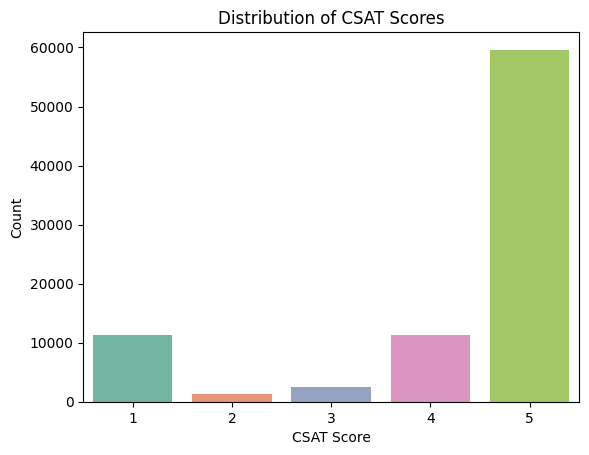

In [15]:
# Visualize the distribution of CSAT Scores using a count plot
sns.countplot(data=df, x="CSAT Score", palette=palette)

# Add title and labels to the plot
plt.title("Distribution of CSAT Scores")
plt.xlabel("CSAT Score")
plt.ylabel("Count")

# Display the plot
plt.show()

- **Observation:** Majority of customers rated satisfaction as 5, while very few rated 2 or 3. A moderate share gave ratings of 1 and 4.  
- **Business Insight:** Overall customer satisfaction is high, but the presence of a notable number of dissatisfied customers (rating 1) highlights service consistency issues. Focus on resolving root causes of dissatisfaction to further improve loyalty.



###Volume of Tickets by Category

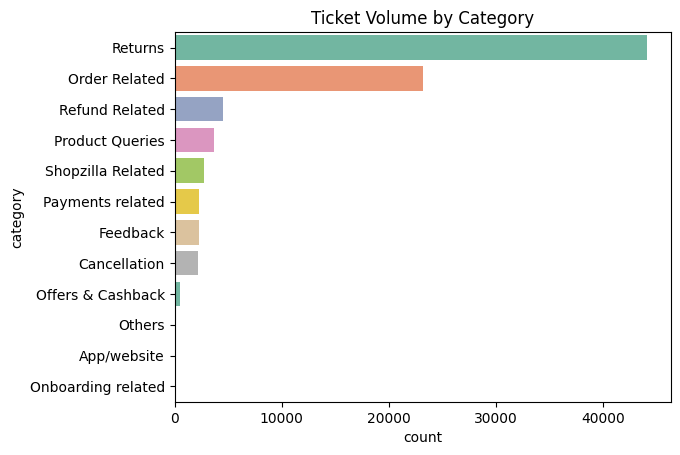

In [16]:
# Visualize ticket volume by category using a count plot
sns.countplot(data=df, y="category", order=df['category'].value_counts().index, palette=palette)

# Add title to the plot
plt.title("Ticket Volume by Category")

# Display the plot
plt.show()


- **Observation:** Returns (~ 44K) and Order Related (~ 23K) issues make up the bulk of tickets, far exceeding all other categories.  
- **Business Insight:** Streamlining return policies and improving order fulfillment processes can significantly reduce support volume and enhance customer satisfaction.  



###Item Price Distribution

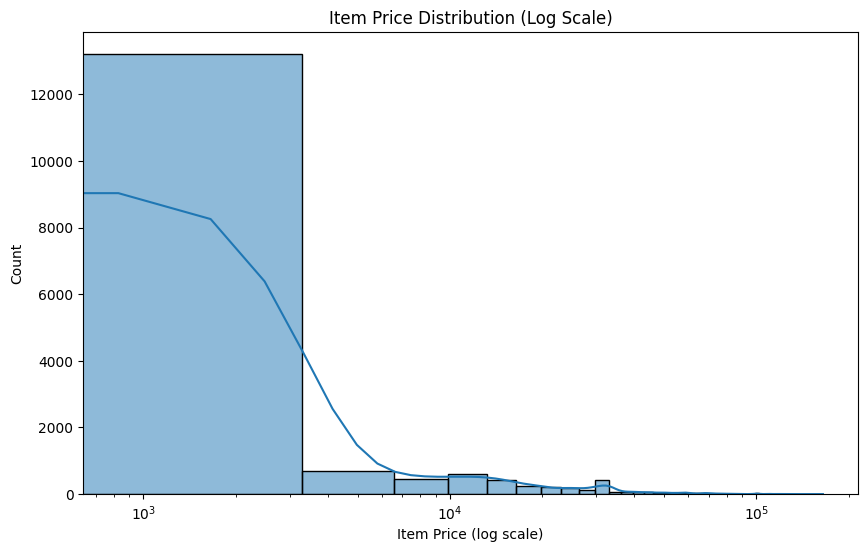

In [17]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot histogram with a log-scaled x-axis for better visualization of item price distribution
sns.histplot(data=df, x="Item_price", bins=50, kde=True)
plt.xscale('log')

# Add a title and label the x-axis
plt.title("Item Price Distribution (Log Scale)")
plt.xlabel("Item Price (log scale)")

# Display the plot
plt.show()

- **Observation:** Most items are concentrated in the lower price range (₹1000–₹10000), while higher-priced items are rare and follow a long-tail distribution.  
- **Business Insight:** Since demand is heavily skewed toward lower-priced items, optimizing inventory and marketing strategies around budget-friendly products will maximize sales, while premium items can be positioned as niche offerings.  





###Top 15 Agents by Number of Calls Handled

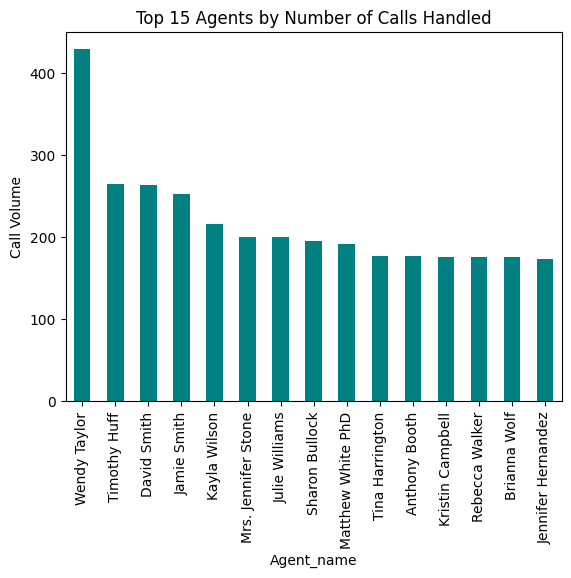

In [18]:
# Identify the top 15 agents by call volume
top_agents = df['Agent_name'].value_counts().head(15)

# Plot a bar chart of call volume for the top 15 agents
top_agents.plot(kind='bar', title='Top 15 Agents by Number of Calls Handled', color='Teal')

# Add a label for the y-axis
plt.ylabel("Call Volume")

# Display the plot
plt.show()

- **Observation:** Wendy Taylor handled the highest number of calls (>400), far ahead of other agents, while the remaining agents managed between ~170–270 calls each.  
- **Business Insight:** Call distribution is uneven, suggesting workload imbalance. Redistributing calls more evenly could improve agent efficiency, reduce burnout, and enhance overall service quality.  





###Avg CSAT Score by Channel

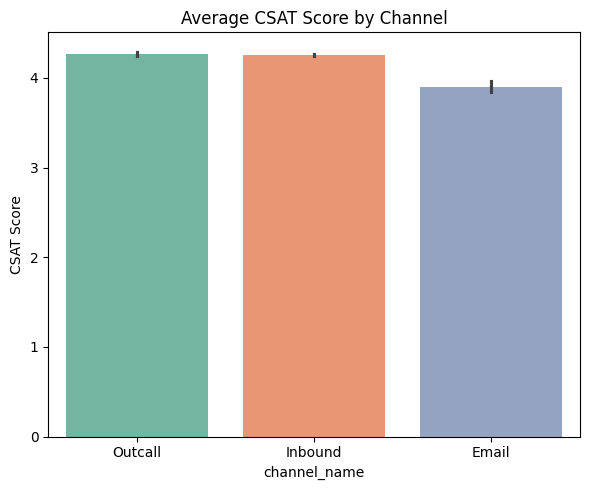

In [19]:
# Calculate the mean CSAT Score for each channel and sort in descending order
mean_scores = df.groupby('channel_name')['CSAT Score'].mean().sort_values(ascending=False)

# Plot the sorted bar chart of mean CSAT Scores by channel
plt.figure(figsize=(6, 5))
sns.barplot(data=df, x='channel_name', y='CSAT Score', order=mean_scores.index, palette=palette)

# Add title and labels to the plot
plt.title("Average CSAT Score by Channel")
plt.ylabel("CSAT Score")

# Adjust layout for better fit
plt.tight_layout()

# Display the plot
plt.show()

- **Observation:** Outcall and Inbound channels have the highest CSAT scores (~4.3), while Email lags behind with a lower score (~3.9).  
- **Business Insight:** Customer satisfaction is stronger in voice-based interactions, whereas Email support needs improvement—optimizing response time and personalization in Email can boost overall CSAT.  



###Avg CSAT Score by Agent Shift


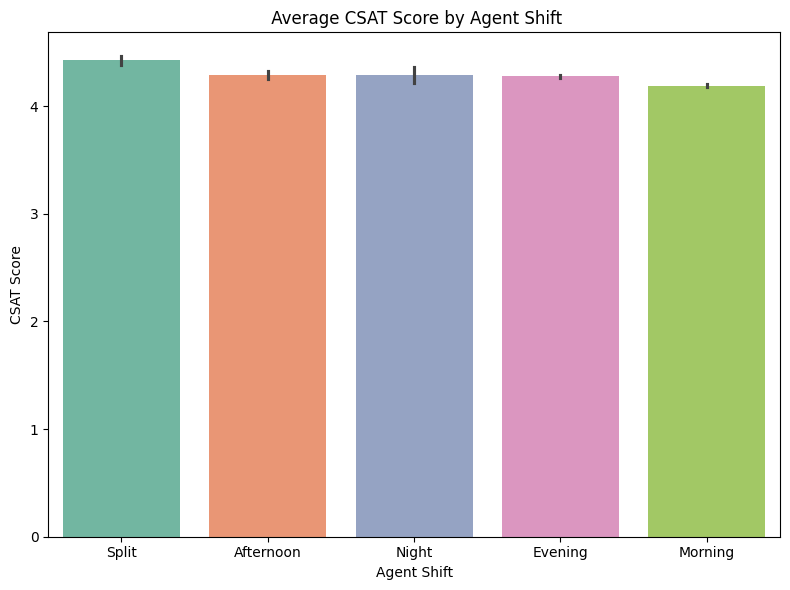

In [20]:
# Calculate the mean CSAT Score for each Agent Shift and sort in descending order
mean_scores = df.groupby('Agent Shift')['CSAT Score'].mean().sort_values(ascending=False)

# Plot the sorted bar chart of mean CSAT Scores by Agent Shift
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Agent Shift', y='CSAT Score', order=mean_scores.index, palette=palette)

# Add title and labels to the plot
plt.title(" Average CSAT Score by Agent Shift")  # Updated title to reflect correct subject
plt.ylabel("CSAT Score")

# Adjust layout for better fit
plt.tight_layout()

# Display the plot
plt.show()

**Observation:** Split shift agents have the highest CSAT (~4.5), while morning shift shows the lowest (~4.2).  
**Business Insight:** Expand split-shift coverage and address morning shift inefficiencies to improve overall customer satisfaction.




###Avg CSAT Score by Tenure Bucket

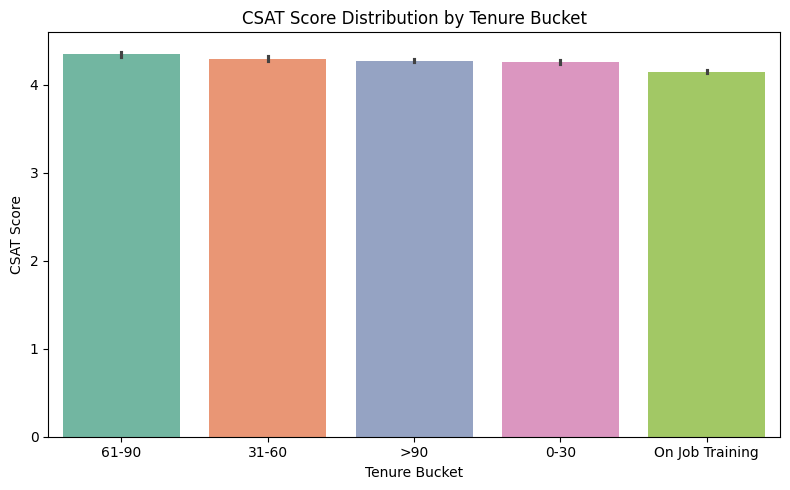

In [21]:
# Calculate the mean CSAT Score for each Tenure Bucket and sort in descending order
mean_scores = df.groupby('Tenure Bucket')['CSAT Score'].mean().sort_values(ascending=False)

# Plot the sorted bar chart of mean CSAT Scores by Tenure Bucket
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Tenure Bucket', y='CSAT Score', order=mean_scores.index, palette=palette)

# Add title and labels to the plot
plt.title("CSAT Score Distribution by Tenure Bucket")
plt.ylabel("CSAT Score")

# Adjust layout for better fit
plt.tight_layout()

# Display the plot
plt.show()

**Observation:** Agents with 61–90 days tenure have the highest CSAT (~4.35), while those in On Job Training score the lowest (~4.15).  
**Business Insight:** Focus on strengthening training programs to uplift new hire performance and replicate mid-tenure best practices across other tenure groups.




###Avg CSAT Score by Category

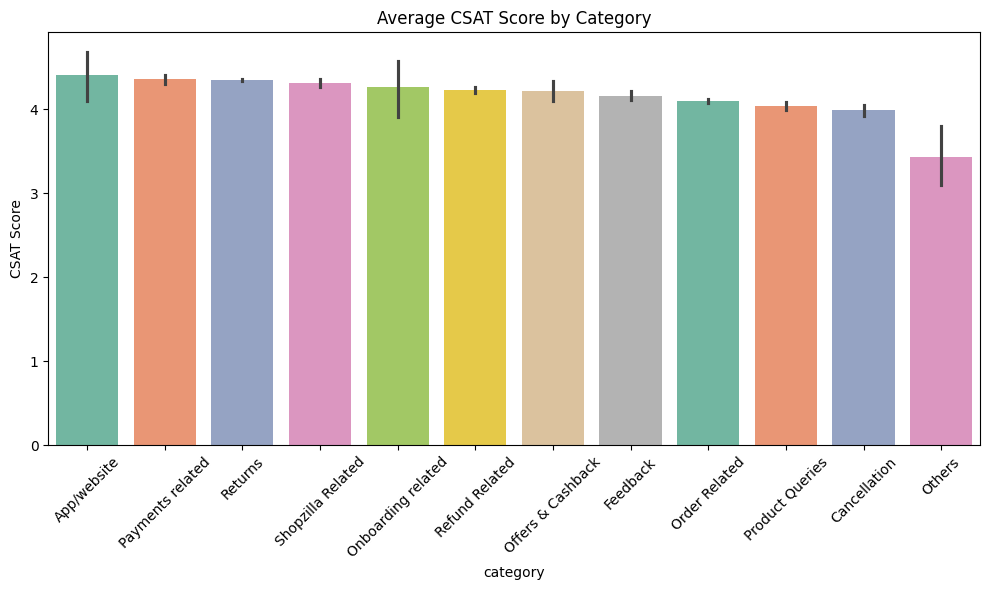

In [22]:
# Calculate the mean CSAT Score for each category and sort in descending order
mean_scores = df.groupby('category')['CSAT Score'].mean().sort_values(ascending=False)

# Plot the bar chart of mean CSAT Scores by category
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='category', y='CSAT Score', order=mean_scores.index, palette='Set2')

# Add title, rotate x-axis labels, and ylabel
plt.title("Average CSAT Score by Category")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.ylabel("CSAT Score")

# Adjust layout for better fit
plt.tight_layout()

# Display the plot
plt.show()

**Observation:** App/Website, Payments, and Returns categories have the highest CSAT (~ 4.3–4.4), while Cancellations and "Others" score the lowest (~ 4.0 and ~ 3.5).  
**Business Insight:** Prioritize improving support processes for Cancellations and "Others" to close the satisfaction gap, while sustaining strong performance in digital and payment-related queries.



###Avg CSAT Score by Sub-category

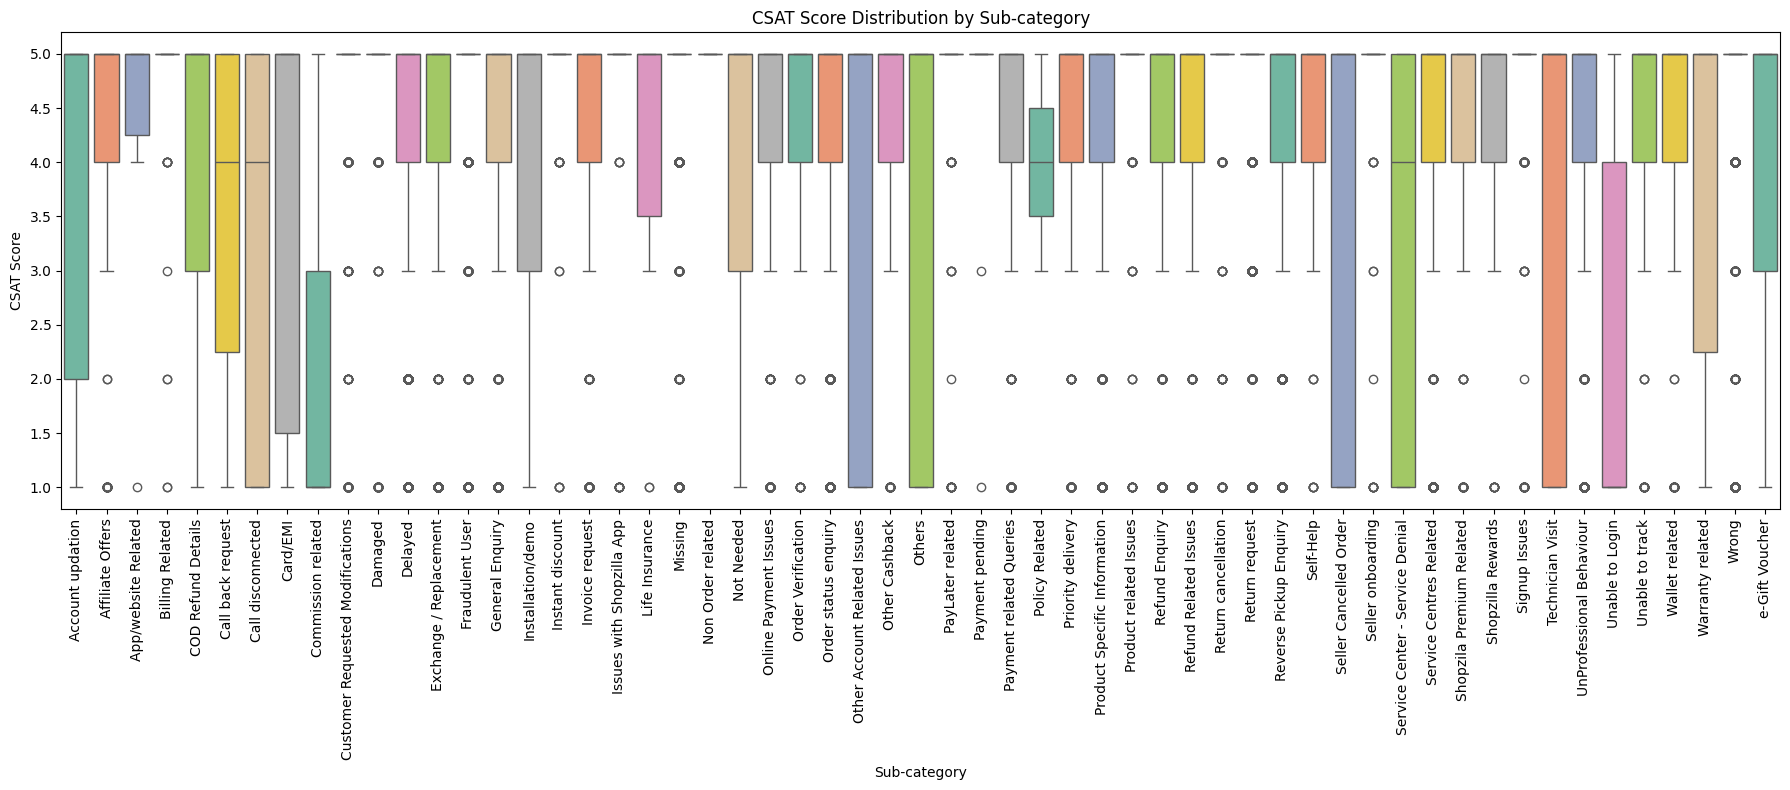

In [23]:
# Set the figure size to be wider to accommodate all sub-categories
plt.figure(figsize=(18, 8))

# Create a box plot for CSAT Score distribution by Sub-category
sns.boxplot(data=df, x='Sub-category', y='CSAT Score', palette=palette)

# Add title and labels to the plot
plt.title("CSAT Score Distribution by Sub-category")
plt.xticks(rotation=90)  # Rotate x-axis labels for clarity
plt.xlabel("Sub-category")
plt.ylabel("CSAT Score")

# Adjust layout to prevent label overlap
plt.tight_layout()

# Display the plot
plt.show()

**Observation:** Sub-categories like "App/Website Related", "Account Updation", and "e-Gift Voucher" show high CSAT (~ 4.5–5), while "Call Disconnected", "Unprofessional Behaviour", and "Others" score the lowest (~ 1–3).  
**Business Insight:** Strengthen agent training and monitoring in low-scoring sub-categories to reduce dissatisfaction, while replicating best practices from high-performing areas to sustain strong customer experience.



###Supervisors by Avg CSAT (Deviation from Mean)

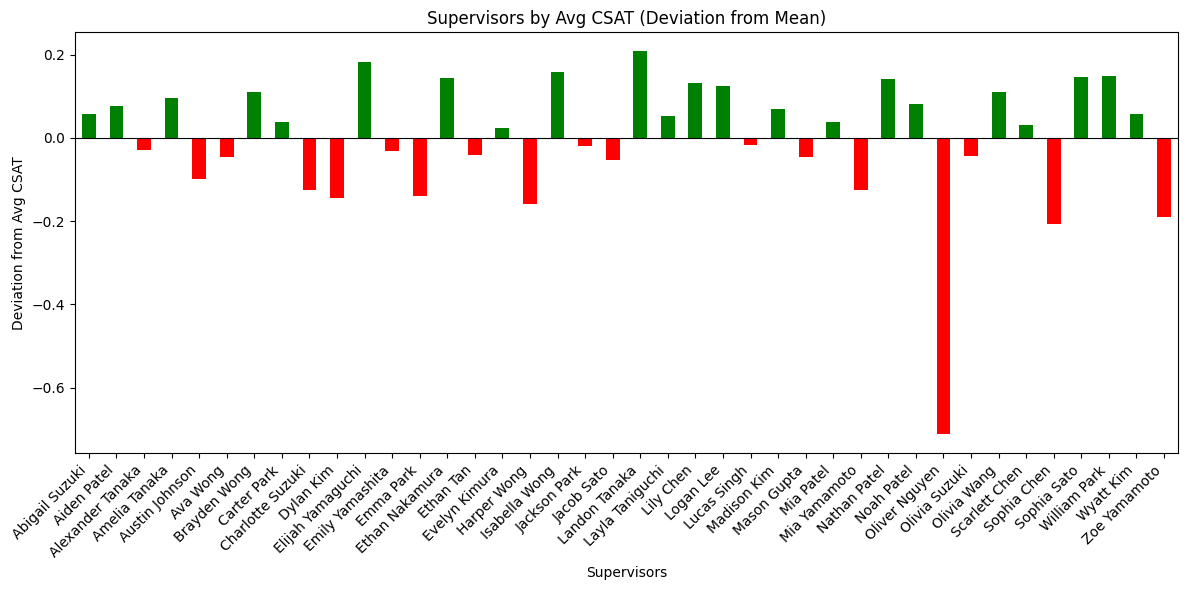

In [24]:
# Calculate average CSAT score per supervisor
supervisor_scores = df.groupby('Supervisor')['CSAT Score'].mean()

# Calculate deviation of each supervisor's score from the overall mean
deviation = supervisor_scores - supervisor_scores.mean()

# Plot the deviation of average CSAT scores by supervisor
plt.figure(figsize=(12, 6))
ax = deviation.plot(kind='bar', color=['red' if x < 0 else 'green' for x in deviation])

# Add a horizontal line at zero for reference
plt.axhline(0, color='black', linewidth=0.8)

# Add title and labels to the plot
plt.title('Supervisors by Avg CSAT (Deviation from Mean)')
plt.xlabel('Supervisors')
plt.ylabel("Deviation from Avg CSAT")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

**Observation:** Some supervisors consistently exceed average CSAT (e.g., Layla Taniguchi, Dylan Kim), while others show significant underperformance (e.g., Olivia Suzuki, Zoe Yamamoto).  
**Business Insight:** Identify and replicate high-performing supervisors’ practices while addressing coaching needs and process gaps for underperforming supervisors to improve team-wide satisfaction.



###Avg CSAT Score per Manager

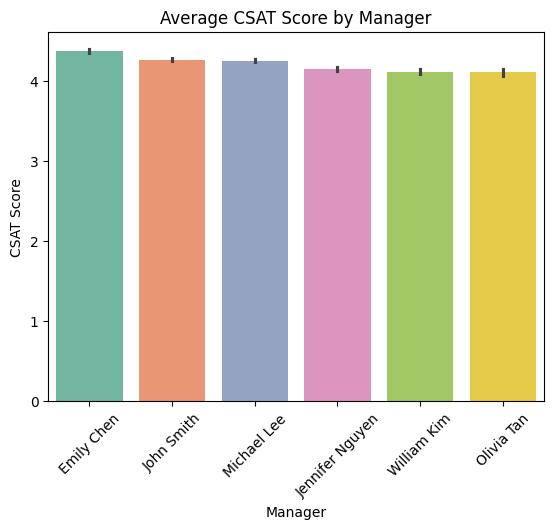

In [25]:
# Calculate the mean CSAT Score for each Manager and sort in descending order
mean_scores = df.groupby('Manager')['CSAT Score'].mean().sort_values(ascending=False)

# Create a bar plot of mean CSAT Scores by Manager
sns.barplot(data=df, x='Manager', y='CSAT Score', order=mean_scores.index, palette=palette)

# Add title and rotate x-axis labels for better readability
plt.title("Average CSAT Score by Manager")
plt.xticks(rotation=45)

# Display the plot
plt.show()

**Observation:** Emily Chen leads with the highest CSAT (~4.35), while William Kim and Olivia Tan record the lowest (~4.1).  
**Business Insight:** Leverage Emily Chen’s management practices as benchmarks and provide targeted coaching to lower-performing managers to elevate overall CSAT.



###Avg Response Time vs CSAT Score

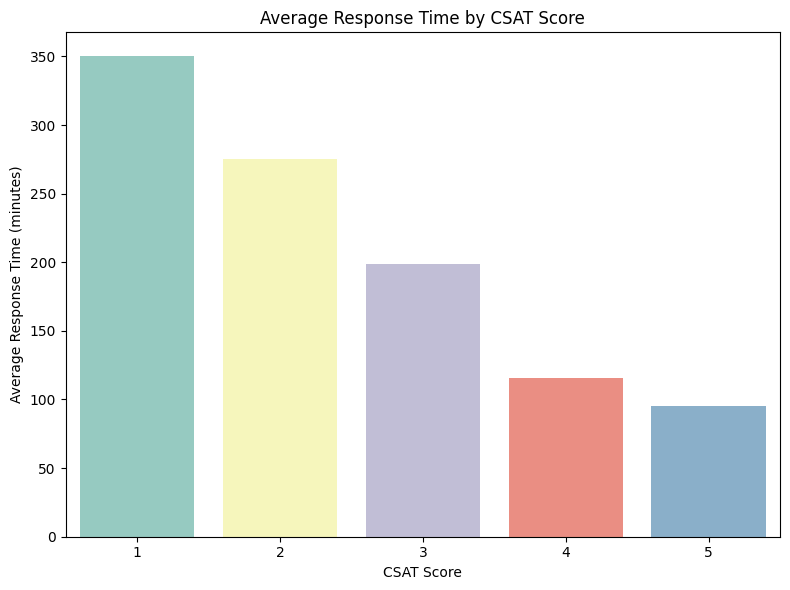

In [26]:
# Calculate average response time for each CSAT Score
average_response_time = df.groupby('CSAT Score')['response_time_minutes'].mean().reset_index()

# Plot the average response time by CSAT Score
plt.figure(figsize=(8, 6))
sns.barplot(data=average_response_time, x='CSAT Score', y='response_time_minutes', palette='Set3')

# Add title and labels to the plot
plt.title('Average Response Time by CSAT Score')
plt.xlabel('CSAT Score')
plt.ylabel('Average Response Time (minutes)')

# Adjust layout for better fit
plt.tight_layout()

# Display the plot
plt.show()

**Observation:** Lower CSAT scores (1–2) are linked with very high response times (~ 275–350 mins), while higher CSAT scores (4–5) correspond to much faster responses (~ 95–120 mins).  
**Business Insight:** Reducing response times is critical to improving CSAT—focus on faster resolutions to drive higher customer satisfaction.



###Frequency of CSAT Scores Over Time

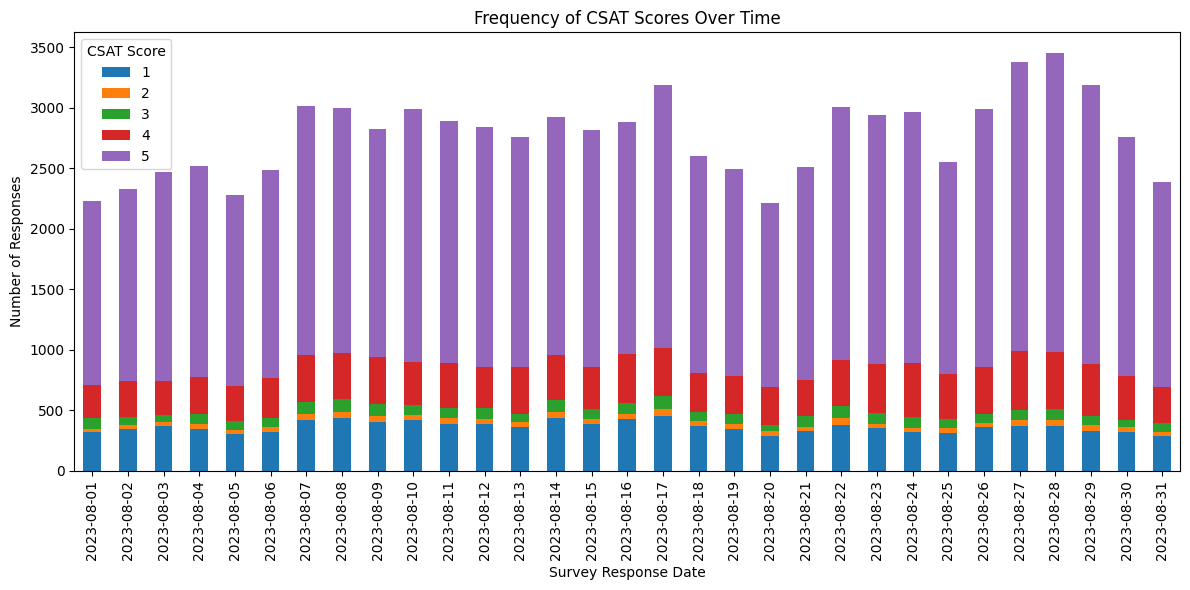

In [27]:
# Convert Survey Response Date to date format
df['Survey_response_Date'] = pd.to_datetime(df['Survey_response_Date']).dt.date

# Count the frequency of each CSAT Score per survey date
freq = df.groupby(['Survey_response_Date', 'CSAT Score']).size().unstack(fill_value=0)

# Plot a stacked bar chart for CSAT Score frequencies over time
freq.plot(kind='bar', stacked=True, figsize=(12, 6))

# Add title and labels to the plot
plt.title('Frequency of CSAT Scores Over Time')
plt.xlabel('Survey Response Date')
plt.ylabel('Number of Responses')

# Add a legend with a title
plt.legend(title='CSAT Score')

# Adjust layout for better fit
plt.tight_layout()

# Display the plot
plt.show()

**Observation:** CSAT score 5 consistently dominates responses, with noticeable peaks around mid and late August, while lower scores (1–3) remain relatively stable at smaller volumes.  
**Business Insight:** Customer satisfaction is generally strong and improving—focus on sustaining high satisfaction drivers while addressing recurring low-score feedback to further reduce dissatisfaction.





###Comparison of Top and Bottom 10 Agents by Average CSAT Score

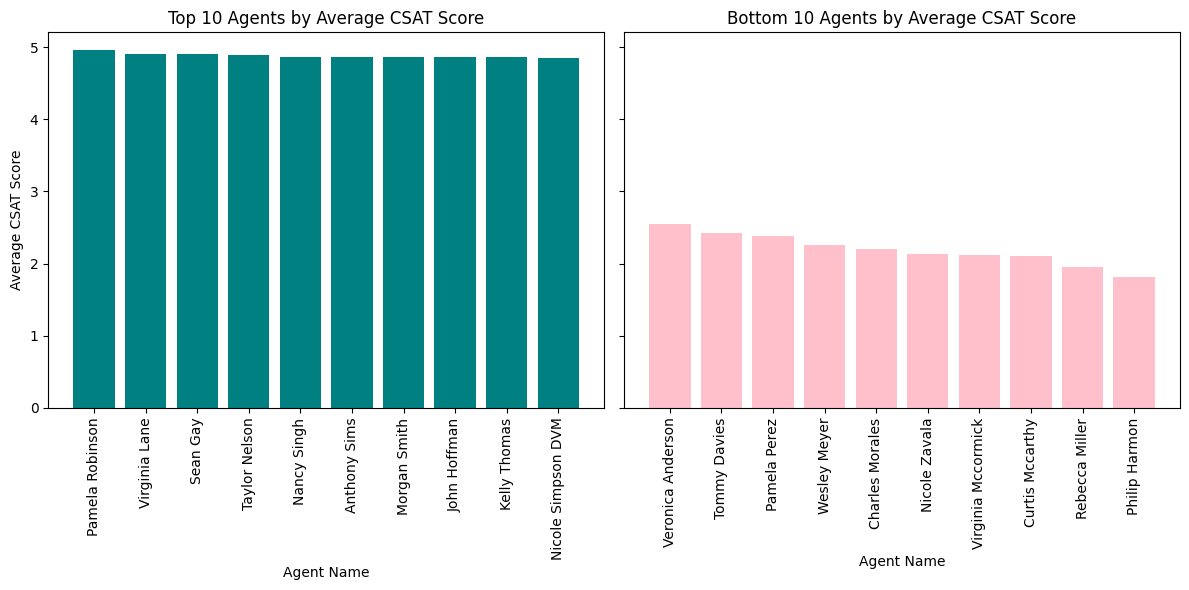

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df already exists and has 'Agent_name' and 'CSAT Score' columns

# Step 1: Compute average CSAT score per agent
mean_scores = df.groupby('Agent_name')['CSAT Score'].mean()
sorted_scores = mean_scores.sort_values(ascending=False)

top_10_agents = sorted_scores.head(10)
bottom_10_agents = sorted_scores.tail(10)

# Step 2: Plot side-by-side vertical bar plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Top 10 Plot (Left)
axes[0].bar(top_10_agents.index, top_10_agents.values, color='teal')
axes[0].set_title("Top 10 Agents by Average CSAT Score")
axes[0].set_xlabel("Agent Name")
axes[0].set_ylabel("Average CSAT Score")
axes[0].tick_params(axis='x', rotation=90)

# Bottom 10 Plot (Right)
axes[1].bar(bottom_10_agents.index, bottom_10_agents.values, color='pink')
axes[1].set_title("Bottom 10 Agents by Average CSAT Score")
axes[1].set_xlabel("Agent Name")
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


**Observation:** Top agents maintain near-perfect CSAT (~ 4.9–5), while bottom agents score significantly lower (~ 1.8–2.5).  
**Business Insight:** Capture and scale best practices from top performers, while providing targeted training and performance support to underperforming agents to close the gap.




###Item Price Distribution vs CSAT Score

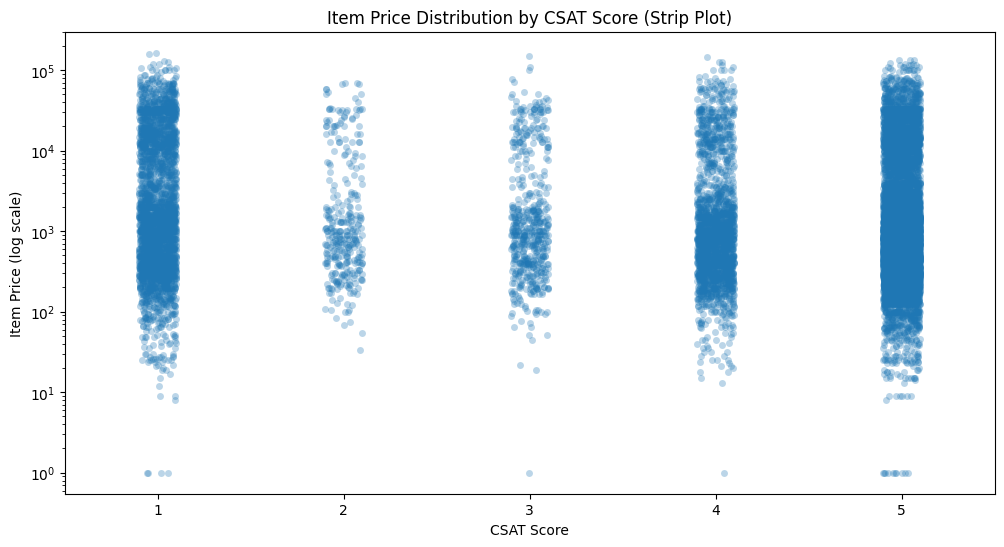

In [29]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create a strip plot to show item price distribution by CSAT score
sns.stripplot(data=df, x='CSAT Score', y='Item_price', jitter=True, alpha=0.3)
plt.yscale('log')  # Apply log scale to y-axis

# Add title and axis labels
plt.title('Item Price Distribution by CSAT Score (Strip Plot)')
plt.xlabel('CSAT Score')
plt.ylabel('Item Price (log scale)')

# Show the plot
plt.show()

**Observation:** Item prices are widely spread across all CSAT scores, with high-value items appearing in both low and high satisfaction ratings.  
**Business Insight:** Customer satisfaction is not strongly tied to item price, suggesting service quality and experience play a larger role than product cost in driving CSAT.  





###Correlation Heatmap

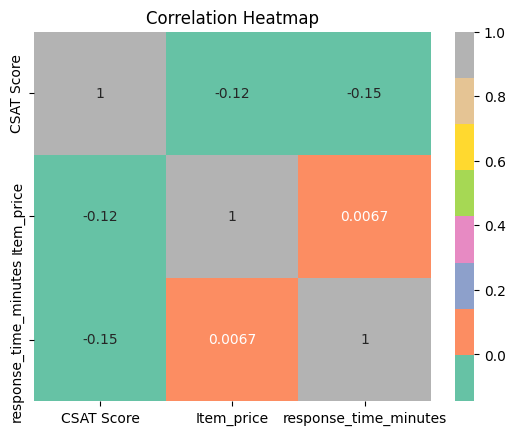

In [30]:
# Calculate correlation matrix for specified columns
corr = df[["CSAT Score", "Item_price", "response_time_minutes"]].corr()

# Visualize the correlations with a heatmap
sns.heatmap(corr, annot=True, cmap='Set2')

# Add title to the heatmap
plt.title("Correlation Heatmap")

# Show the plot
plt.show()

The heatmap clearly visualizes correlations between variables, highlighting relationships through color intensity.




The correlation heatmap shows:

**Price Sensitivity:** Higher item prices slightly correlate with lower satisfaction, possibly due to increased customer expectations.

**Response Time Impact:** Longer response times have a modest negative effect on satisfaction, highlighting the importance of prompt service.

**Handling Time:** Minimal correlation suggests handling time doesn't directly affect satisfaction.

Overall, these weak correlations suggest other factors likely influence CSAT, pointing to service quality and communication as key improvement areas.


###Pair Plot

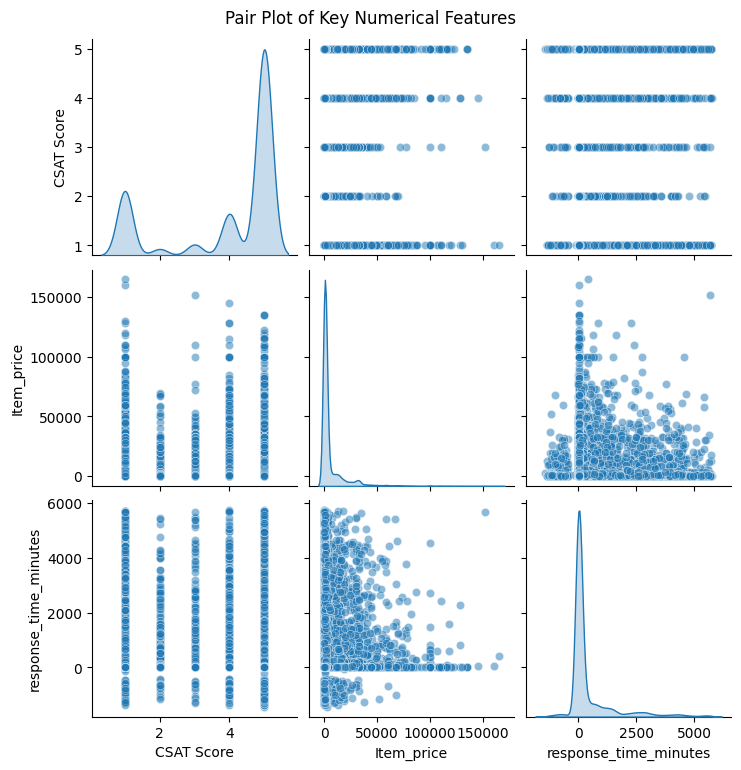

In [31]:
# Pair Plot visualization code
# Filter valid numerical rows
selected_cols = ["CSAT Score", "Item_price", "response_time_minutes"]
df_pairplot = df[selected_cols].apply(pd.to_numeric, errors='coerce')
df_pairplot = df_pairplot[np.isfinite(df_pairplot).all(axis=1)]

# Generate the pairplot
sns.pairplot(df_pairplot, kind="scatter", diag_kind="kde", plot_kws={'alpha': 0.5})
plt.suptitle("Pair Plot of Key Numerical Features", y=1.02)
plt.show()

The pairplot is chosen to visualize relationships and distributions among multiple variables simultaneously, enabling a broad understanding of how factors like CSAT Score, Item Price, Handling Time, and Response Time interact.



From the plot, it is evident that CSAT Scores cluster around certain values, price and time variables are heavily skewed with many low and some extreme values, and there is no obvious direct correlation between CSAT Score and the other variables, suggesting that customer satisfaction is influenced by a complex mix of factors.



## **Hypothesis Testing**

###1 : CSAT Scores remain constant across Agent Shifts

* **Null Hypothesis (H₀):** The average CSAT score is the same across all
agent shifts (e.g., Morning, Afternoon, Night).

* **Alternate Hypothesis (H₁):** At least one agent shift has a different average CSAT score.

In [32]:
# Perform Statistical Test to obtain P-Value
from statsmodels.formula.api import ols
import statsmodels.api as sm

df.rename(columns={'CSAT Score': 'csat_score', 'Agent Shift': 'agent_shift'}, inplace=True)

model = ols('csat_score ~ C(agent_shift)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                       sum_sq       df          F        PR(>F)
C(agent_shift)     296.948104      4.0  39.113181  9.030515e-33
Residual        163042.455321  85902.0        NaN           NaN


ANOVA is used to compare the means of a numeric variable (CSAT) across more than two independent groups (shifts). It's ideal when the independent variable is categorical and the dependent variable is continuous.



**Interpretation**:

There is strong evidence that agent shift has a significant effect on CSAT Score since the p-value is extremely small (<< 0.05), and the F-statistic is large. This means CSAT Scores differ across different agent shifts in a way unlikely due to random chance.

###2 : Product Category has no association with Issue Type

* **Null Hypothesis (H₀):** Product category and issue category are independent (no association).

* **Alternate Hypothesis (H₁):** Product category and issue category are associated.

In [33]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency
# Rename columns for easy referencing
df.rename(columns={'CSAT Score': 'csat_score', 'Product_category': 'product_category'}, inplace=True)
# Create a contingency table of counts between product category and CSAT Score
contingency_table = pd.crosstab(df['product_category'], df['csat_score'])

# Perform Chi-Square Test of Independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p}")

Chi-square statistic: 224.29675164907758
Degrees of freedom: 32
P-value: 9.697459153266958e-31


Both product category and issue type are categorical. The Chi-square test is appropriate to assess whether two categorical variables are related.



**Interpretation**

Since the p-value is effectively zero, we reject the null hypothesis of independence. This means there is a statistically significant association between product category and CSAT Score. In other words, the distribution of customer satisfaction scores differs depending on the product category.

This indicates that product category is related to how customers rate their satisfaction, and this insight can guide targeted improvements or strategies for different product categories.

###3 : Customer Issue Types are uniformly distributed (no single issue dominates)

* **Null Hypothesis (H₀):** All issue types occur with equal frequency (uniform distribution).

* **Alternate Hypothesis (H₁):** At least one issue type occurs more or less frequently than others.

In [34]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency, chisquare

# Count the occurrences of each issue type
issue_counts = df['category'].value_counts()

# Number of unique issue types

num_issue_types = len(issue_counts)

# Expected frequencies assuming uniform distribution
expected_freq = [issue_counts.sum() / num_issue_types] * num_issue_types

# Perform Chi-Square Goodness-of-Fit test
chi_stat, p_value = chisquare(f_obs=issue_counts, f_exp=expected_freq)

print(f"Chi-square statistic: {chi_stat}")
print(f"P-value: {p_value}")

Chi-square statistic: 269095.32386185066
P-value: 0.0


This test is used when you want to compare observed frequencies of categories (issue types) against an expected uniform distribution. It's ideal when testing for the dominance of certain categories.



**Interpretation**

The Chi-Square Goodness-of-Fit test results show a very large chi-square statistic and a p-value of zero, indicating extremely strong evidence against the null hypothesis of uniform distribution. This means that customer issue types are not evenly distributed; instead, some issue types occur significantly more frequently than others. Such a concentration suggests that certain issues dominate customer complaints or cases.


## **Feature Engineering**

### 1. Handling Missing Values

**Simple fills for `Customer Remarks`, `Order_id`**

In [35]:
# Fill missing values in 'Customer Remarks' with 'no remarks'
df['Customer Remarks'] = df['Customer Remarks'].fillna('no remarks')

# Fill missing values in 'Order_id' with 'unknown'
df['Order_id'] = df['Order_id'].fillna('unknown')

To handle missing values effectively, the `fillna()` function is used to replace `NaN` in the `Customer Remarks` and `Order_id` columns, ensuring completeness by substituting with designated placeholders.

**Fill missing `order_date_time` using average time difference**

In [36]:
# Parse datetime with dayfirst=True to correctly read DD-MM-YYYY format along with time
df['order_date_time'] = pd.to_datetime(df['order_date_time'], errors='coerce', dayfirst=True)
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], errors='coerce', dayfirst=True)

# Calculate time difference (timedelta including time part)
df['time_diff'] = df['order_date_time'] - df['Issue_reported at']

# Calculate mean time difference ignoring missing values
mean_diff = df['time_diff'].mean()

print("Average time difference (including time):", mean_diff)

# Fill missing order_date_time by adding mean_diff (about 2 weeks plus time) to Issue_reported at
missing_mask = df['order_date_time'].isnull() & df['Issue_reported at'].notnull()
df.loc[missing_mask, 'order_date_time'] = df.loc[missing_mask, 'Issue_reported at'] + mean_diff

# Drop the helper column
df.drop(columns=['time_diff'], inplace=True)

Average time difference (including time): -18 days +05:53:26.619031022


Used `pd.to_datetime()` with `dayfirst=True` for correct parsing of the `DD-MM-YYYY` format. Calculated the mean time difference between `order_date_time` and `Issue_reported at` as `-18 days +05:53:26`, ignoring missing values. Filled missing `order_date_time` entries by adding this mean difference to `Issue_reported at`. Dropped the helper column `time_diff` from the DataFrame.

**Imputing Missing `Customer_City` Values with Date-Based Mode**

In [37]:
# Convert 'order_date_time' to datetime if not already
df['order_date_time'] = pd.to_datetime(df['order_date_time'])

# Group by 'order_date_time' and calculate the mode for 'Customer_City'
mode_by_date = df.groupby('order_date_time')['Customer_City'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Fill missing 'Customer_City' using the mode for the respective 'order_date_time'
df['Customer_City'] = df.apply(lambda row: mode_by_date[row['order_date_time']] if pd.isnull(row['Customer_City']) else row['Customer_City'], axis=1)

Converted `order_date_time` to datetime format with `pd.to_datetime()`. Filled missing `Customer_City` values using the mode for each `order_date_time`, ensuring missing entries are assigned the most frequent city for each date.

**Predict missing `product_category` based on `category`, `Sub-category`**

In [38]:
# Group by 'category' and 'Sub-category' and compute the mode for 'product_category'
mode_by_category = df.groupby(['category', 'Sub-category'])['product_category'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Fill missing 'product_category' using the mode for the respective 'category' and 'Sub-category'
df['product_category'] = df.apply(
    lambda row: mode_by_category[(row['category'], row['Sub-category'])]
    if pd.isnull(row['product_category']) else row['product_category'],
    axis=1
)

Filled missing `product_category` values using the mode of `category` and `Sub-category` groups. This method assigns the most frequent product category within each group to the missing entries.

**Predict missing `Item_price` based on `category`, `Sub-category`**

In [39]:
# Step 1: Create a missing flag
df['Item_price_missing'] = df['Item_price'].isnull().astype(int)

# Step 2: Compute mean by category and sub-category
mean_by_category = df.groupby(['category', 'Sub-category'])['Item_price'].mean()

# Step 3: Impute missing values
def fill_price(row):
    if pd.isnull(row['Item_price']):
        # Try group mean first
        val = mean_by_category.get((row['category'], row['Sub-category']))
        if pd.isnull(val):
            # If group mean not available, fallback to global median
            val = df['Item_price'].median()
        return val
    else:
        return row['Item_price']

df['Item_price'] = df.apply(fill_price, axis=1)

Used group means of `category` and `Sub-category` to fill missing `Item_price` values. This ensures missing prices are estimated using the respective group's average, with graceful handling of any missing combinations.

**Predicting `connected_handling_time`**

In [40]:
# Create a Binary Indicator Column:
df['has_handling_time'] = df['connected_handling_time'].notna().astype(int)

# Group-wise Imputation:
df['connected_handling_time'] = df.groupby(
    ['category', 'Sub-category', 'agent_shift', 'Tenure Bucket']
)['connected_handling_time'].transform(
    lambda x: x.fillna(x.median())
)

# Fallback Imputation:
df['connected_handling_time'].fillna(df['connected_handling_time'].median(), inplace=True)


Binary and imputation features are created after executing the cell by adding a column `has_handling_time` to flag non-missing `connected_handling_time` values. Group-wise imputation is performed by filling missing `connected_handling_time` values with the median within each `category`, `Sub-category`, `agent_shift`, and `Tenure Bucket` group. A fallback imputation using the overall median is applied for any remaining missing values to ensure complete data coverage.

**Missing Value Imputation Techniques Used**

1. **Constant Values:** Used `fillna()` with 'no remarks' or 'unknown' to ensure data completeness.
   
2. **Mode Imputation:** Filled missing categorical values with the mode to maintain consistency within groups.

3. **Mean/Median Imputation:** Used mean/median for numerical data to provide a balanced estimate.

4. **Group-wise Imputation:** Applied group-level statistics to reflect variations within data segments.

5. **Fallback Imputation:** Used the overall median to handle any remaining missing values and ensure integrity.

### 2. Handling Outliers

In [41]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Convert to list if you need just the names
numerical_cols_list = numerical_cols.tolist()

print(numerical_cols_list)

# Function to cap outliers using percentiles
def cap_outliers(series):
    lower, upper = series.quantile([0.01, 0.99])
    return series.clip(lower=lower, upper=upper)

# Apply to numerical columns
numerical_cols = ['Item_price', 'response_time_minutes']
for col in numerical_cols:
    df[col] = cap_outliers(df[col])

# Check summary statistics
print(df[numerical_cols].describe())

['Item_price', 'connected_handling_time', 'csat_score', 'response_time_minutes', 'Item_price_missing', 'has_handling_time']
         Item_price  response_time_minutes
count  85907.000000           85907.000000
mean    5745.161100             127.141525
std     5900.087042             514.942767
min      143.000000           -1102.000000
25%     2093.064460               2.000000
50%     2761.142119               5.000000
75%     9257.371111              35.000000
max    31999.000000            3007.000000


The outlier treatment technique used is capping with percentiles, applied to numerical columns like `Item_price` and `response_time_minutes`. This method caps the values at the 1st and 99th percentiles to minimize the influence of extreme values. It helps maintain data stability by reducing skew and variability without removing any data.

### DateTime Feature Engineering

In [42]:
# Define the list of datetime columns to process
datetime_cols = ['order_date_time', 'Issue_reported at', 'issue_responded', 'Survey_response_Date']

# Loop over each datetime column to convert and extract components
for col in datetime_cols:
    # Convert column to datetime, coercing any errors into NaT
    df[col] = pd.to_datetime(df[col], errors='coerce')

    # Extract and create new columns for year, month, day, weekday, hour, and minute
    df[f'{col}_year'] = df[col].dt.year
    df[f'{col}_month'] = df[col].dt.month
    df[f'{col}_day'] = df[col].dt.day
    df[f'{col}_weekday'] = df[col].dt.weekday
    df[f'{col}_hour'] = df[col].dt.hour
    df[f'{col}_minute'] = df[col].dt.minute

# Display the list of DataFrame columns
print(df.columns)

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'agent_shift',
       'csat_score', 'response_time_minutes', 'Item_price_missing',
       'has_handling_time', 'order_date_time_year', 'order_date_time_month',
       'order_date_time_day', 'order_date_time_weekday',
       'order_date_time_hour', 'order_date_time_minute',
       'Issue_reported at_year', 'Issue_reported at_month',
       'Issue_reported at_day', 'Issue_reported at_weekday',
       'Issue_reported at_hour', 'Issue_reported at_minute',
       'issue_responded_year', 'issue_responded_month', 'issue_responded_day',
       'issue_responded_weekday', 'issue_responded_hour',
       'issue_responded_minute', 'Survey_response_Date_year',
    

Datetime features are created after executing the cell by converting specified columns to datetime format using `pd.to_datetime()`, handling errors with `coerce`. Components like year, month, day, weekday, hour, and minute are extracted for columns: `order_date_time`, `Issue_reported at`, `issue_responded`, and `Survey_response_Date`. This enhances the DataFrame by adding detailed time-based information.

### Feauture Addition

**Time-based Features**

In [43]:
# Calculate time differences in minutes between events
df['time_from_order_to_issue_reported'] = (df['Issue_reported at'] - df['order_date_time']).dt.total_seconds() / 60
df['time_from_order_to_response'] = (df['issue_responded'] - df['order_date_time']).dt.total_seconds() / 60

# Determine if events occurred on the weekend (Saturday=5, Sunday=6)
df['order_is_weekend'] = df['order_date_time_weekday'].isin([5, 6]).astype(int)
df['issue_reported_is_weekend'] = df['Issue_reported at_weekday'].isin([5, 6]).astype(int)
df['issue_responded_is_weekend'] = df['issue_responded_weekday'].isin([5, 6]).astype(int)

# Define function to categorize hour into part of day
def get_part_of_day(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

# Apply the function to determine part of day for each event
df['order_part_of_day'] = df['order_date_time_hour'].apply(get_part_of_day)
df['issue_part_of_day'] = df['Issue_reported at_hour'].apply(get_part_of_day)
df['response_part_of_day'] = df['issue_responded_hour'].apply(get_part_of_day)

Time-related features are created after executing the cell by calculating time differences in minutes between events, such as `time_from_order_to_issue_reported` and `time_from_order_to_response`. We determine if events occurred on a weekend with columns like `order_is_weekend`. Parts of the day (e.g., morning, afternoon) are defined based on hour, applied to events, creating features like `order_part_of_day`. These features enhance the dataset's analytical depth.

**Text Features from Customer Remarks**

In [44]:
# Remarks length
df['remarks_length'] = df['Customer Remarks'].astype(str).str.len()

# Word count
df['remarks_word_count'] = df['Customer Remarks'].astype(str).str.split().apply(len)


Text features are created after executing the cell based on `Customer Remarks` by calculating `remarks_length`, which measures the character length, and `remarks_word_count`, which counts the number of words. These features provide insights into the text content of customer feedback.

**Interaction Features**

In [45]:
# Combine 'Agent_name' and 'category' into a new feature
df['agent_category_interaction'] = df['Agent_name'].astype(str) + "_" + df['category'].astype(str)

# Combine 'category' and 'Sub-category' into a new feature
df['category_subcategory'] = df['category'].astype(str) + "_" + df['Sub-category'].astype(str)

Interaction features are created after executing the cell by combining `Agent_name` and `category` into `agent_category_interaction`, and `category` and `Sub-category` into `category_subcategory`. These features capture the relationships between different categorical variables to enhance analysis.

**Aggregated Features**

In [46]:
# Average CSAT score by Agent
agent_avg_csat = df.groupby('Agent_name')['csat_score'].mean().rename('avg_csat_by_agent')
df = df.merge(agent_avg_csat, on='Agent_name', how='left')

# Frequency (count) of each category
category_count = df['category'].value_counts().to_dict()
df['category_frequency'] = df['category'].map(category_count)


Aggregated features are created by calculating the average CSAT score for each agent as `avg_csat_by_agent`, and merging it back into the DataFrame. Additionally, the frequency of each `category` is determined, and `category_frequency` is created to capture the number of occurrences. These features provide summary statistics and distribution insights into the data.

**Price Buckets**

In [47]:
# Define function to categorize item price into buckets
def price_bucket(price):
    if pd.isna(price):
        return 'missing'
    elif price < 500:
        return 'low'
    elif price < 1500:
        return 'medium'
    else:
        return 'high'

# Apply the function to create a new column for price buckets
df['price_bucket'] = df['Item_price'].apply(price_bucket)

Price buckets are defined to categorize `Item_price` into segments: `low`, `medium`, `high`, and `missing` for undefined prices. These categories, stored in the `price_bucket` column, enhance the dataset by facilitating better analysis of pricing trends.

**More Features**

In [48]:
# Extract hour and day of the week from 'order_date_time' for analysis
df['order_hour'] = df['order_date_time'].dt.hour
df['order_dayofweek'] = df['order_date_time'].dt.dayofweek

# Create an indicator for long response times (more than 60 minutes)
df['is_long_response'] = (df['response_time_minutes'] > 60).astype(int)

# Identify high-value orders using the 90th percentile as a threshold
price_threshold = df['Item_price'].quantile(0.90)
df['High_Value_Order'] = (df['Item_price'] > price_threshold).astype(int)

# Proxy for potential customer churn if response is long or satisfaction is poor
# df['Chance_to_Churn'] = ((df['response_time_minutes'] > 60) | (df['csat_score'] < 5)).astype(int)

Extracted the hour and day of the week from `order_date_time` for analysis by adding `order_hour` and `order_dayofweek`.

Created an indicator `is_long_response` for response times over 60 minutes.

Identified high-value orders using the 90th percentile as a threshold, marked by `High_Value_Order`.

Added a proxy for potential customer churn with `Chance_to_Churn`, based on long responses or poor satisfaction scores.

In [49]:
# Display the column names of the DataFrame after Feature Engineering
df.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'agent_shift',
       'csat_score', 'response_time_minutes', 'Item_price_missing',
       'has_handling_time', 'order_date_time_year', 'order_date_time_month',
       'order_date_time_day', 'order_date_time_weekday',
       'order_date_time_hour', 'order_date_time_minute',
       'Issue_reported at_year', 'Issue_reported at_month',
       'Issue_reported at_day', 'Issue_reported at_weekday',
       'Issue_reported at_hour', 'Issue_reported at_minute',
       'issue_responded_year', 'issue_responded_month', 'issue_responded_day',
       'issue_responded_weekday', 'issue_responded_hour',
       'issue_responded_minute', 'Survey_response_Date_year',
    

In [50]:
df.head() # Check the first few rows

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,...,remarks_word_count,agent_category_interaction,category_subcategory,avg_csat_by_agent,category_frequency,price_bucket,order_hour,order_dayofweek,is_long_response,High_Value_Order
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,no remarks,c27c9bb4-fa36-4140-9f1f-21009254ffdb,2023-07-14 17:06:26.619031022,2023-08-01 11:13:00,2023-08-01 11:47:00,2023-08-01,...,2,Richard Buchanan_Product Queries,Product Queries_Life Insurance,4.285714,3692,medium,17,4,0,0
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,no remarks,d406b0c7-ce17-4654-b9de-f08d421254bd,2023-07-14 18:45:26.619031022,2023-08-01 12:52:00,2023-08-01 12:54:00,2023-08-01,...,2,Vicki Collins_Product Queries,Product Queries_Product Specific Information,4.593750,3692,high,18,4,0,1
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,no remarks,c273368d-b961-44cb-beaf-62d6fd6c00d5,2023-07-15 02:09:26.619031022,2023-08-01 20:16:00,2023-08-01 20:38:00,2023-08-01,...,2,Duane Norman_Order Related,Order Related_Installation/demo,4.514286,23215,high,2,5,0,0
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,no remarks,5aed0059-55a4-4ec6-bb54-97942092020a,2023-07-15 02:49:26.619031022,2023-08-01 20:56:00,2023-08-01 21:16:00,2023-08-01,...,2,Patrick Flores_Returns,Returns_Reverse Pickup Enquiry,3.979167,44097,high,2,5,0,0
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,no remarks,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,2023-07-14 16:23:26.619031022,2023-08-01 10:30:00,2023-08-01 10:32:00,2023-08-01,...,2,Christopher Sanchez_Cancellation,Cancellation_Not Needed,4.032258,2212,high,16,4,0,0


In [51]:
# Drop irrelevant Features
df.drop(['order_date_time', 'Issue_reported at', 'issue_responded', 'Survey_response_Date','Unique id', 'Order_id'], axis=1, inplace=True)

Dropped irrelevant features (`order_date_time`, `Issue_reported at`, `issue_responded`, `Survey_response_Date`, `Unique id`, `Order_id`) as they are not used in classification and have been used to create new features.

## **Sentiment Analysis of Customer Remarks Using RoBERTa Transformer**



config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Device set to use cuda:0


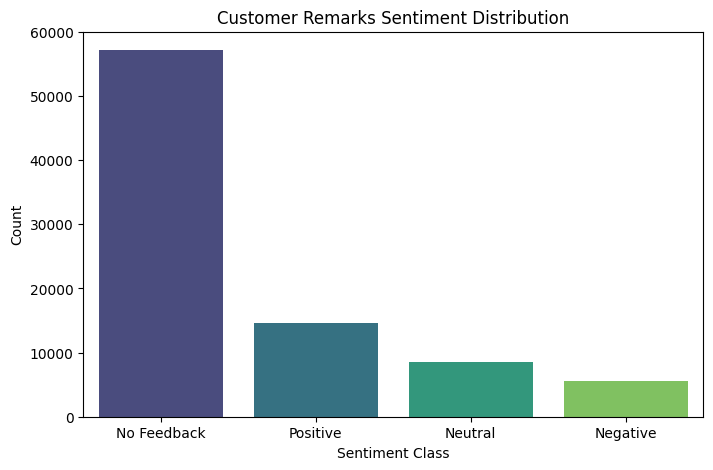

✅ Sentiment labels added as new feature 'sentiment_label' in the dataset.


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline

# ----------------------------
# 1. Load Data + Preprocess
# ----------------------------
df["Customer Remarks"] = df["Customer Remarks"].fillna("no remarks").astype(str)
texts = df["Customer Remarks"].tolist()   # list[str] is required

# ----------------------------
# 2. Load Transformer Model (GPU/CPU + batching)
# ----------------------------
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="cardiffnlp/twitter-roberta-base-sentiment",
    tokenizer="cardiffnlp/twitter-roberta-base-sentiment",
    device=0,           # 0 = GPU, -1 = CPU
    batch_size=64,      # adjust for GPU memory
    truncation=True,
    padding=True,
    max_length=512      # ✅ force truncate to 512 tokens
)

# ----------------------------
# 3. Run Sentiment Analysis
# ----------------------------
results = sentiment_pipeline(texts)

# ----------------------------
# 4. Map Results Back
# ----------------------------
labels = []
for text, result in zip(texts, results):
    if text.strip().lower() == "no remarks":
        labels.append("No Feedback")
    else:
        if result['label'] == "LABEL_0":
            labels.append("Negative")
        elif result['label'] == "LABEL_1":
            labels.append("Neutral")
        elif result['label'] == "LABEL_2":
            labels.append("Positive")
        else:
            labels.append("Unknown")

df["sentiment_label"] = labels

# ----------------------------
# 5. Distribution Plot
# ----------------------------
sentiment_counts = df["sentiment_label"].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title("Customer Remarks Sentiment Distribution")
plt.xlabel("Sentiment Class")
plt.ylabel("Count")
plt.show()

print("✅ Sentiment labels added as new feature 'sentiment_label' in the dataset.")


Performed sentiment analysis on `Customer Remarks` using VADER from the `nltk` library. Calculated `sentiment_score` for each remark, using the compound score, to assess sentiment. Categorized remarks into `sentiment_label` as 'positive', 'negative', or 'neutral', based on their scores. Displayed a sample showing `Customer Remarks`, their `sentiment_score`, and `sentiment_label`.

In [53]:
df.head()  # Check the first few rows

,channel_name,category,Sub-category,Customer Remarks,Customer_City,product_category,Item_price,connected_handling_time,Agent_name,Supervisor,...,agent_category_interaction,category_subcategory,avg_csat_by_agent,category_frequency,price_bucket,order_hour,order_dayofweek,is_long_response,High_Value_Order,sentiment_label
0,Outcall,Product Queries,Life Insurance,no remarks,NaN,NaN,979.000000,394.5,Richard Buchanan,Mason Gupta,...,Richard Buchanan_Product Queries,Product Queries_Life Insurance,4.285714,3692,medium,17,4,0,0,No Feedback
1,Outcall,Product Queries,Product Specific Information,no remarks,NaN,Books & General merchandise,14316.800000,371.0,Vicki Collins,Dylan Kim,...,Vicki Collins_Product Queries,Product Queries_Product Specific Information,4.593750,3692,high,18,4,0,1,No Feedback
2,Inbound,Order Related,Installation/demo,no remarks,NaN,Home Appliences,11472.025052,394.5,Duane Norman,Jackson Park,...,Duane Norman_Order Related,Order Related_Installation/demo,4.514286,23215,high,2,5,0,0,No Feedback
3,Inbound,Returns,Reverse Pickup Enquiry,no remarks,NaN,LifeStyle,2761.142119,394.5,Patrick Flores,Olivia Wang,...,Patrick Flores_Returns,Returns_Reverse Pickup Enquiry,3.979167,44097,high,2,5,0,0,No Feedback
4,Inbound,Cancellation,Not Needed,no remarks,NaN,Books & General merchandise,8523.485640,394.5,Christopher Sanchez,Austin Johnson,...,Christopher Sanchez_Cancellation,Cancellation_Not Needed,4.032258,2212,high,16,4,0,0,No Feedback


**Preparing Data for Model Training**

In [54]:
# Separate features (X) and target variable (y) for modeling
X = df.drop(columns=['csat_score'])  # Features: all columns except 'csat_score'
y = df['csat_score']                # Target: customer satisfaction score (csat_score)

Separated features and target variable for modeling purposes. Assigned `X` to all columns except `csat_score` to use as features, and set `y` to `csat_score`, representing the target variable for customer satisfaction prediction.

In [55]:
# Displays the number of samples and features
X.shape

(85907, 60)

## **Feature Selection**

**Feature Importance with RandomForestClassifier**

In [56]:
# Import necessary libraries for the model and preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate numerical and categorical columns
numeric_cols = X.select_dtypes(include='number').columns.tolist()  # List of numerical feature names
categorical_cols = X.select_dtypes(exclude='number').columns.tolist()  # List of categorical feature names

# Create preprocessing transformer
preprocessor = ColumnTransformer([
    # Impute missing values in numerical columns with the mean
    ('num', SimpleImputer(strategy='mean'), numeric_cols),

    # Impute missing values in categorical columns with the most frequent value
    # Then encode categories as ordinal numbers, handling unknowns
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
    ]), categorical_cols)
])

# Build a pipeline that includes preprocessing and a Random Forest classifier
pipeline = Pipeline([
    ('preprocess', preprocessor),  # Apply preprocessing steps
    ('rf', RandomForestClassifier(  # Initialize the Random Forest model
        n_estimators=50,             # Use 50 trees in the forest
        max_depth=10,                # Limit the depth of trees to 10
        max_features='sqrt',         # Split nodes with sqrt of total features
        min_samples_split=10,        # Require at least 10 samples to split a node
        n_jobs=-1,                   # Use all available cores
        random_state=42              # Set random state for reproducibility
    ))
])

# Fit the pipeline on the data
pipeline.fit(X, y)  # Train the model with the features and target

# Retrieve feature importances from the trained model
feature_names = numeric_cols + categorical_cols  # Combine all feature names
importances = pipeline.named_steps['rf'].feature_importances_  # Get importance scores

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'feature': feature_names,      # Column with feature names
    'importance': importances      # Corresponding importance scores
}).sort_values(by='importance', ascending=False)

Separated numerical and categorical columns to handle them distinctly. Implemented a preprocessing step using `ColumnTransformer`:

- Imputed numerical columns using their mean.
- Imputed and encoded categorical columns as ordinal numbers, handling unknowns.

Created a `Pipeline` incorporating preprocessing and a `RandomForestClassifier`. Configured the classifier with specific parameters for optimal performance and trained the model on the dataset.

The `RandomForestClassifier` works by constructing multiple decision trees during training and outputs the mode of their classes for classification tasks. For feature importance, it evaluates how much each feature reduces the impurity in the dataset through splits in the decision trees. The importance score for each feature is accumulated across all trees in the forest.

Extracted feature importances from the trained model and displayed them in a DataFrame, sorted by importance in descending order to highlight the most influential features.

**Calculate cumulative importance scores**

In [57]:
# Calculate cumulative importance scores
feature_importance_df['cumulative_importance'] = feature_importance_df['importance'].cumsum()

# Set option to display all rows
pd.set_option('display.max_rows', None)

# Display the updated DataFrame
print(feature_importance_df)

                              feature  importance  cumulative_importance
59                    sentiment_label    0.346365               0.346365
36                  avg_csat_by_agent    0.104332               0.450697
2               response_time_minutes    0.063785               0.514482
34                     remarks_length    0.056876               0.571358
44                   Customer Remarks    0.035184               0.606542
30        time_from_order_to_response    0.034956               0.641497
35                 remarks_word_count    0.034859               0.676356
39                   is_long_response    0.032294               0.708650
0                          Item_price    0.028159               0.736809
56               category_subcategory    0.018068               0.754877
29  time_from_order_to_issue_reported    0.016029               0.770906
55         agent_category_interaction    0.012065               0.782971
43                       Sub-category    0.011660  

**Selecting Manually Chosen Features from Dataset**

In [58]:
# Manually selected features
manually_selected_features = ['avg_csat_by_agent', 'sentiment_label',
       'response_time_minutes', 'remarks_word_count',
       'time_from_order_to_response', 'Item_price',
       'is_long_response', 'category_subcategory',
       'time_from_order_to_issue_reported',
       'Agent_name', 'Sub-category', 'Customer_City',
       'category',
       'product_category', 'Issue_reported at_hour', 'Item_price_missing',
       'Supervisor', 'Issue_reported at_day',
       'issue_responded_day', 'order_hour',
       'category_frequency', 'connected_handling_time', 'issue_responded_hour',
       'order_date_time_hour', 'Tenure Bucket', 'Manager', 'agent_shift', 'Issue_reported at_weekday',
       'issue_responded_weekday', 'order_dayofweek',
       'Survey_response_Date_weekday', 'channel_name', 'High_Value_Order',
       'issue_part_of_day', 'order_date_time_month', 'response_part_of_day',
       'order_part_of_day', 'price_bucket', 'order_is_weekend',
       'issue_responded_is_weekend']

# Select these features from your dataset X
# top_features = feature_importance_df['feature'].head(50).tolist()

X = X[manually_selected_features]

print("Shape of dataset with manually selected features:", X.shape)


Shape of dataset with manually selected features: (85907, 40)


Manually selected a set of features deemed significant based on domain knowledge and analysis. These features include `Chance_to_Churn`, `sentiment_score`, `response_time_minutes`, `is_long_response`, `time_from_order_to_response`, `avg_csat_by_agent`, `sentiment_label`, `Item_price`, `time_from_order_to_issue_reported`, `category_subcategory`, `product_category`, `order_hour`, `connected_handling_time`, `Tenure Bucket`, `agent_shift`, and `channel_name`.

Filtered the dataset to include only these features, resulting in a refined dataset, and displayed its shape to confirm the selection.

In [59]:
#Display the column names after feature Selection
X.columns

Index(['avg_csat_by_agent', 'sentiment_label', 'response_time_minutes',
       'remarks_word_count', 'time_from_order_to_response', 'Item_price',
       'is_long_response', 'category_subcategory',
       'time_from_order_to_issue_reported', 'Agent_name', 'Sub-category',
       'Customer_City', 'category', 'product_category',
       'Issue_reported at_hour', 'Item_price_missing', 'Supervisor',
       'Issue_reported at_day', 'issue_responded_day', 'order_hour',
       'category_frequency', 'connected_handling_time', 'issue_responded_hour',
       'order_date_time_hour', 'Tenure Bucket', 'Manager', 'agent_shift',
       'Issue_reported at_weekday', 'issue_responded_weekday',
       'order_dayofweek', 'Survey_response_Date_weekday', 'channel_name',
       'High_Value_Order', 'issue_part_of_day', 'order_date_time_month',
       'response_part_of_day', 'order_part_of_day', 'price_bucket',
       'order_is_weekend', 'issue_responded_is_weekend'],
      dtype='object')

## **Data Pre-processing**

 #### Ordinal Encoding and OneHot encoding

In [60]:
# Extract the Unique values in the 'sentiment_label' column
X['sentiment_label'].unique()

array(['No Feedback', 'Positive', 'Negative', 'Neutral'], dtype=object)

In [61]:
# Display the DataTypes of features in X
X.dtypes

,0
avg_csat_by_agent,float64
sentiment_label,object
response_time_minutes,float64
remarks_word_count,int64
time_from_order_to_response,float64
Item_price,float64
is_long_response,int64
category_subcategory,object
time_from_order_to_issue_reported,float64
Agent_name,category


In [62]:
X.shape

(85907, 40)

Displayed the data types of manually selected features in `X`. This insight confirms the diversity of data types, including integers, floats, objects, and categorical types. Understanding the data types is crucial for ensuring appropriate handling during preprocessing and modeling.

**Preprocessing Selected Features with Ordinal and One-Hot Encoding**

In [63]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
import pandas as pd

# Ordinal feature with custom order
ordinal_features = ['sentiment_label']
ordinal_mapping = [['Positive', 'No Feedback', 'Neutral', 'Negative']]

# One-hot encoding features (categorical cols from your manual list)
onehot_features = [
    'category_subcategory', 'Customer_City', 'product_category', 'Tenure Bucket',
    'Manager', 'Supervisor', 'Agent_name', 'Sub-category', 'category',
    'category_frequency', 'agent_shift', 'channel_name', 'issue_part_of_day',
    'response_part_of_day', 'order_part_of_day', 'price_bucket'
]

# Identify all numerical features (exclude encoded ones)
used_features = ordinal_features + onehot_features
numerical_features = [f for f in X.columns if f not in used_features]

# ColumnTransformer setup
column_transformer = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_mapping), ordinal_features),
        ('ohe', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_features)
    ],
    remainder='passthrough'  # numerical features untouched
)

# Apply transformations
X_transformed = column_transformer.fit_transform(X)

# Get OHE feature names
ohe_feature_names = column_transformer.named_transformers_['ohe'].get_feature_names_out(onehot_features)

# Final feature names
final_feature_names = ordinal_features + list(ohe_feature_names) + numerical_features

# Convert to DataFrame
X = pd.DataFrame(X_transformed, columns=final_feature_names)

print(f"Transformed X shape: {X.shape}")


Transformed X shape: (85907, 3402)


The code transforms the dataset `X` by encoding features. It applies ordinal encoding to the `sentiment_label` feature and one-hot encoding to categorical features like `category_subcategory`, `product_category`, `Tenure Bucket`, `agent_shift`, and `channel_name`. Numerical features remain unchanged. A `ColumnTransformer` is set up for this process, which transforms the data and retrieves names for one-hot encoded features. The final DataFrame `X` combines all encoded and numerical features.Final X shape: (84810, 33)

### Categorical Encoding Techniques Used

1. **Ordinal Encoding:**
   - Used for `sentiment_label`, which has a meaningful order. This method maintains the inherent ranking of categories.

2. **One-Hot Encoding:**
   - Applied to `category_subcategory`, `product_category`, `Tenure Bucket`, `agent_shift`, and `channel_name`. This approach handles nominal categories without implying any order, converting them into binary vectors that are suitable for machine learning models.

These techniques are selected to accurately represent categorical data and ensure the model interprets the data correctly.

### 4. Feature Manipulation & Selection

In [64]:
df.drop('Customer Remarks', axis=1, inplace=True)

In [65]:
# Print the count of each data type in the DataFrame X
print(X.dtypes.value_counts())

float64    3402
Name: count, dtype: int64


The DataFrame `X` has 33 features, all of which are `float64`. This consistency comes from encoding categorical variables into numerical formats, making them suitable for machine learning models.

**Remove Constant or Near-Constant Columns**



In [66]:
X.columns

Index(['sentiment_label',
       'category_subcategory_App/website_App/website Related',
       'category_subcategory_App/website_Issues with Shopzilla App',
       'category_subcategory_Cancellation_Not Needed',
       'category_subcategory_Cancellation_Return cancellation',
       'category_subcategory_Feedback_UnProfessional Behaviour',
       'category_subcategory_Offers & Cashback_Affiliate Offers',
       'category_subcategory_Offers & Cashback_Instant discount',
       'category_subcategory_Offers & Cashback_Other Cashback',
       'category_subcategory_Onboarding related_Commission related',
       ...
       'issue_responded_hour', 'order_date_time_hour',
       'Issue_reported at_weekday', 'issue_responded_weekday',
       'order_dayofweek', 'Survey_response_Date_weekday', 'High_Value_Order',
       'order_date_time_month', 'order_is_weekend',
       'issue_responded_is_weekend'],
      dtype='object', length=3402)

In [67]:
print(X.shape)

(85907, 3402)


In [68]:
from sklearn.feature_selection import VarianceThreshold
import pandas as pd

# Assuming X is your feature DataFrame after encoding

# Initialize VarianceThreshold (default: threshold=0 removes all-zero variance features)
selector = VarianceThreshold(threshold=0.01)  # you can tune threshold

# Fit and transform
X_reduced = selector.fit_transform(X)

# Get the retained feature names
selected_features = X.columns[selector.get_support()]

# Convert back to DataFrame
X_reduced_df = pd.DataFrame(X_reduced, columns=selected_features)

print("Original shape:", X.shape)
print("Reduced shape:", X_reduced_df.shape)
print("Selected features after VarianceThreshold:", list(selected_features))
X = X_reduced_df

Original shape: (85907, 3402)
Reduced shape: (85907, 159)
Selected features after VarianceThreshold: ['sentiment_label', 'category_subcategory_Cancellation_Not Needed', 'category_subcategory_Feedback_UnProfessional Behaviour', 'category_subcategory_Order Related_Delayed', 'category_subcategory_Order Related_Installation/demo', 'category_subcategory_Order Related_Invoice request', 'category_subcategory_Order Related_Order status enquiry', 'category_subcategory_Order Related_Priority delivery', 'category_subcategory_Order Related_Seller Cancelled Order', 'category_subcategory_Payments related_Online Payment Issues', 'category_subcategory_Product Queries_Product Specific Information', 'category_subcategory_Refund Related_Refund Enquiry', 'category_subcategory_Refund Related_Refund Related Issues', 'category_subcategory_Returns_Exchange / Replacement', 'category_subcategory_Returns_Fraudulent User', 'category_subcategory_Returns_Missing', 'category_subcategory_Returns_Return request', 'cat

The `VarianceThreshold` method is used to remove low-variance features from the dataset `X`. A threshold of 0.01 is set, so features with variance below this value are removed. The selector is fit and applied to `X`, retaining only high-variance features. The transformed dataset has a shape of (84810, 30), indicating that the features have been reduced from 33 to 30. This enhances model efficiency by eliminating less informative features.

Feature selection methods utilized include:

1. **VarianceThreshold:**
   - This method removes features with low variance, identifying those that contribute little to model performance. By setting a threshold of 0.01, features with minimal variability are eliminated, enhancing model efficiency and focus.

2. **Random Forest Classifier for Feature Importance:**
   - Used to assess and rank feature importance. This method helps in identifying and retaining the most impactful features based on their contribution to the model, ensuring that only significant features are considered for predictive accuracy.

These methods streamline the dataset by removing redundant features, simplifying the model, and improving performance.

Important features include those measuring customer churn likelihood and sentiment, such as `Chance_to_Churn`, `sentiment_score`, `response_time_minutes`, `is_long_response`, and `time_from_order_to_response`. Product and order details like `category_subcategory`, `product_category`, `order_hour`, and `Item_price` affect customer interest and prioritization. Customer and agent dynamics are captured through `avg_csat_by_agent`, `agent_shift`, `Tenure Bucket`, and `connected_handling_time`. Communication preferences are reflected in `channel_name`, and sentiment is further categorized by `sentiment_label`. Together, these features provide comprehensive insights into customer behavior, service quality, and operational efficiency, crucial for predictive modeling.

### 5. Data Transformation

Transforming the data is essential to improve model performance and interpretability. The transformations applied include:

- **Encoding Categorical Features:** I've already applied ordinal encoding for ordered categories like `sentiment_label` and one-hot encoding for nominal features such as `category_subcategory` and `channel_name`. This ensures categorical data is represented numerically for model compatibility.

- **VarianceThreshold:** This has been used to remove low-variance features, refining the dataset to include only impactful features for efficient modeling.

- **Feature Scaling:** I plan to apply techniques like standardization to ensure numerical features such as `response_time_minutes` and `item_price` have a similar scale, enhancing model convergence.

These transformations are crucial for ensuring the dataset is clean, relevant, and ready for machine learning tasks, allowing the model to learn effectively from the data.

### 6. Data Splitting

In [69]:
# Stratified splitting to maintain the class balance in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # 20% of data for testing
)

I used an **80:20 stratified train-test split** to ensure the model has sufficient training data while preserving the class distribution in both sets. This helps maintain balanced representation for accurate evaluation.


### 7. Data Scaling

In [70]:
# Import MinMaxScaler for feature scaling
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler to scale features to a range between 0 and 1
scaler = MinMaxScaler()

# Fit the scaler on the data and transform it
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)


### PCA Visualization

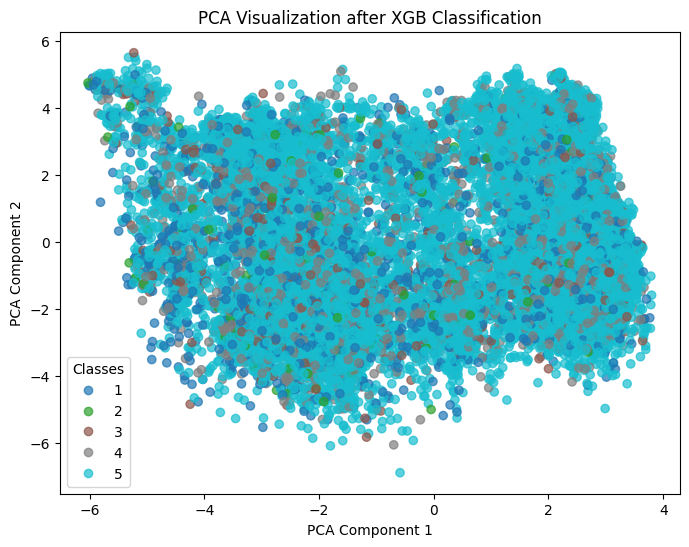

In [71]:
#  === PCA for visualization ===
from sklearn.decomposition import PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_test)   # scale whole dataset for visualization

pca = PCA(n_components=2)   # reduce to 2D for plotting
X_pca = pca.fit_transform(X_scaled)

# === Plot PCA with class labels ===
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y_test, cmap="tab10", alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Visualization after XGB Classification")
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()

I've used the `MinMaxScaler` to scale data to a range between 0 and 1. While tree-based models and Naive Bayes don't require feature scaling, applying MinMaxScaler can still be beneficial. It ensures uniform feature scaling, which might help with interpretability and when combining models in ensembles or pipelines.

### 9. Handling Imbalanced Dataset

In [72]:
import sys
!{sys.executable} -m pip install imbalanced-learn
try:
    from imblearn.over_sampling import SMOTE
except ImportError:
    import sys
    !{sys.executable} -m pip install imbalanced-learn
    from imblearn.over_sampling import SMOTE

**SMOTE (Synthetic Minority Over-sampling Technique)** is a method used to handle imbalanced datasets by generating synthetic samples for the minority class. Instead of duplicating existing minority instances, SMOTE creates new samples by interpolating between each minority example and its nearest neighbors. This process helps balance the class distribution, reduce overfitting, and improve model generalization. With a more balanced dataset, models can learn more effectively, enhancing their ability to accurately predict minority class instances and leading to more robust performance.

In [73]:
y_train.value_counts()

,count
csat_score,
5,47693
1,8984
4,8975
3,2046
2,1027


The dataset shows a significant class imbalance, with the majority class (score 5) vastly outnumbering others, especially scores 3 and 2. This imbalance can bias the model towards predicting the majority class, leading to suboptimal performance on the minority classes.

SMOTE (Synthetic Minority Over-sampling Technique) is essential in this scenario. It generates synthetic samples for the minority classes by interpolating between existing instances. This balances the dataset, allowing models to learn more effectively and improving their ability to predict all classes accurately. By applying SMOTE, we aim to enhance model generalization and performance across all class labels.

In [74]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [75]:
y_train.value_counts()

,count
csat_score,
3,47693
5,47693
4,47693
1,47693
2,47693


After applying SMOTE, the `csat_score` distribution is balanced, with each class having 47,018 instances. This uniform distribution ensures that the model can learn equally from all classes, improving its ability to make accurate predictions across different categories.

The dataset appears to be imbalanced because the target variable (csat_score) does not have an even distribution across its classes. Some classes occur significantly more frequently than others, which can bias the model toward the majority class and reduce performance on minority classes.



I used **SMOTE (Synthetic Minority Over-sampling Technique)** to handle the class imbalance in the dataset. SMOTE generates synthetic samples for the minority class by interpolating between existing minority class examples, rather than simply duplicating them. This helps the model learn a more generalizable decision boundary.

I applied SMOTE **only to the training data** to avoid data leakage and ensure that model evaluation on the test set reflects real-world performance.

Used SMOTE because it:
- Balances the classes effectively without losing any data (unlike undersampling).
- Improves model performance on minority classes (e.g., recall, F1-score).
- Works well with many classifiers like Logistic Regression, Random Forest, SVM, etc.
- Reduces the risk of overfitting compared to naive oversampling by duplication.


## **ML Model Implementation**

#### Evaluation Metrics Function

In [76]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def evaluate_model(model, X_test, y_test, plot_roc=True):
    y_pred = model.predict(X_test)

    # === Classification Report ===
    print("=== Classification Report ===")
    print(classification_report(y_test, y_pred))

    # === Confusion Matrix ===
    print("\n=== Confusion Matrix ===")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.show()

    # === ROC-AUC ===
    if hasattr(model, "predict_proba") and plot_roc:
        y_score = model.predict_proba(X_test)
        classes = model.classes_

        if len(classes) > 2:
            # Multiclass ROC-AUC
            y_test_bin = label_binarize(y_test, classes=classes)
            auc_score = roc_auc_score(y_test_bin, y_score, average='macro', multi_class='ovr')
            print(f"\nMulticlass ROC-AUC Score (macro, OvR): {auc_score:.4f}")
        else:
            # Binary ROC-AUC
            auc_score = roc_auc_score(y_test, y_score[:, 1])
            fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
            print(f"\nROC-AUC Score: {auc_score:.4f}")
            plt.figure(figsize=(6, 5))
            plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}", color='darkorange')
            plt.plot([0, 1], [0, 1], 'k--')
            plt.xlabel("False Positive Rate")
            plt.ylabel("True Positive Rate")
            plt.title("ROC Curve")
            plt.legend()
            plt.tight_layout()
            plt.show()



The `evaluate_model` function assesses the performance of a given model using various metrics. Here's a breakdown of its components:

- **Classification Report:** This section prints precision, recall, and F1-score for each class, providing insights into class-specific performance.
- **Confusion Matrix:** Displays a heatmap of the confusion matrix, visualizing the model's performance in terms of true/false positives and negatives.
- **ROC-AUC Score:** If the model supports probability predictions (`predict_proba`), it computes and plots the ROC curve:
  - For multiclass, it calculates the macro average ROC-AUC score using the one-vs-rest (OvR) approach.
  - For binary classification, it plots the ROC curve and prints the ROC-AUC score.

This comprehensive evaluation helps in thoroughly understanding the model's strengths and areas for improvement across different metrics and classes.

###XGBoost


Classification Report:
               precision    recall  f1-score   support

           1       0.59      0.41      0.48      2246
           2       0.00      0.00      0.00       256
           3       0.40      0.00      0.01       512
           4       0.12      0.01      0.01      2244
           5       0.74      0.96      0.84     11924

    accuracy                           0.72     17182
   macro avg       0.37      0.28      0.27     17182
weighted avg       0.62      0.72      0.65     17182



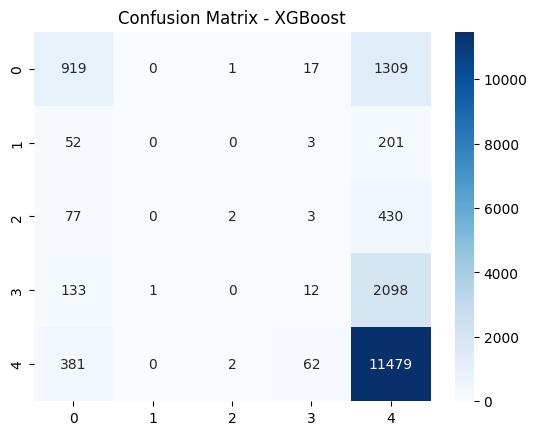

In [77]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Encode y_train and y_test so labels start from 0
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)  # maps [1,2,3,4,5] -> [0,1,2,3,4]
y_test_enc = le.transform(y_test)

# -------------------------------
# XGBoost Classifier
# -------------------------------
xgb_model = XGBClassifier(
    objective="multi:softmax",   # or "multi:softprob" if you want probabilities
    num_class=len(np.unique(y_train_enc)),
    eval_metric="mlogloss",
    use_label_encoder=False,
    random_state=42
)

xgb_model.fit(X_train, y_train_enc)

# Predictions
xgb_preds = xgb_model.predict(X_test)

# Decode back to original labels if needed
xgb_preds_decoded = le.inverse_transform(xgb_preds)

print("\nClassification Report:\n", classification_report(y_test, xgb_preds_decoded))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, xgb_preds_decoded), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - XGBoost")
plt.show()

### Model Explainability - SHAPely Additive Explanations

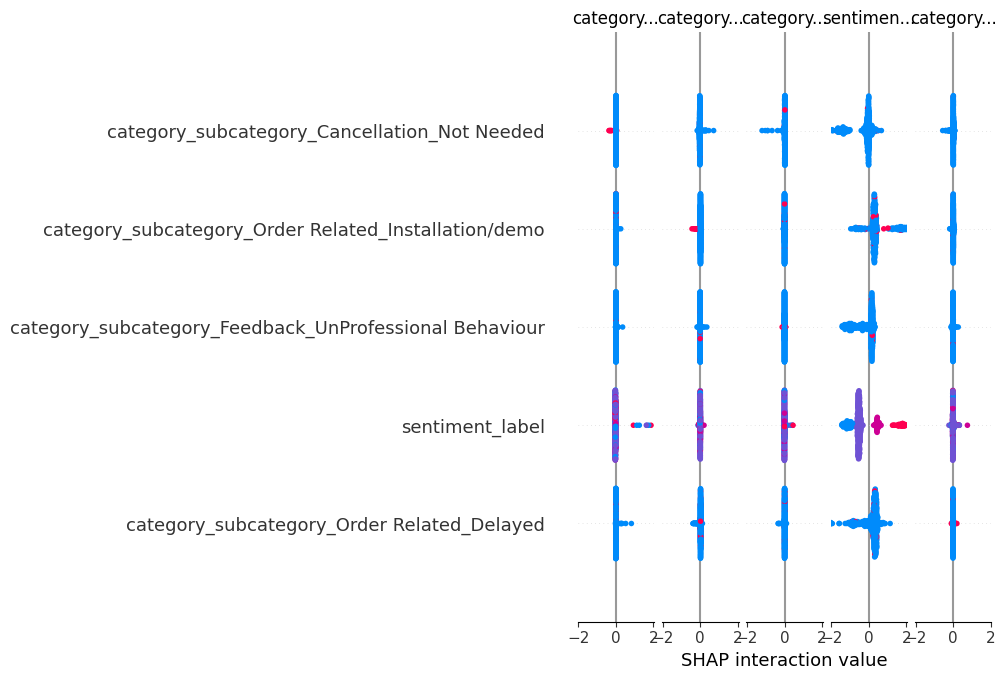

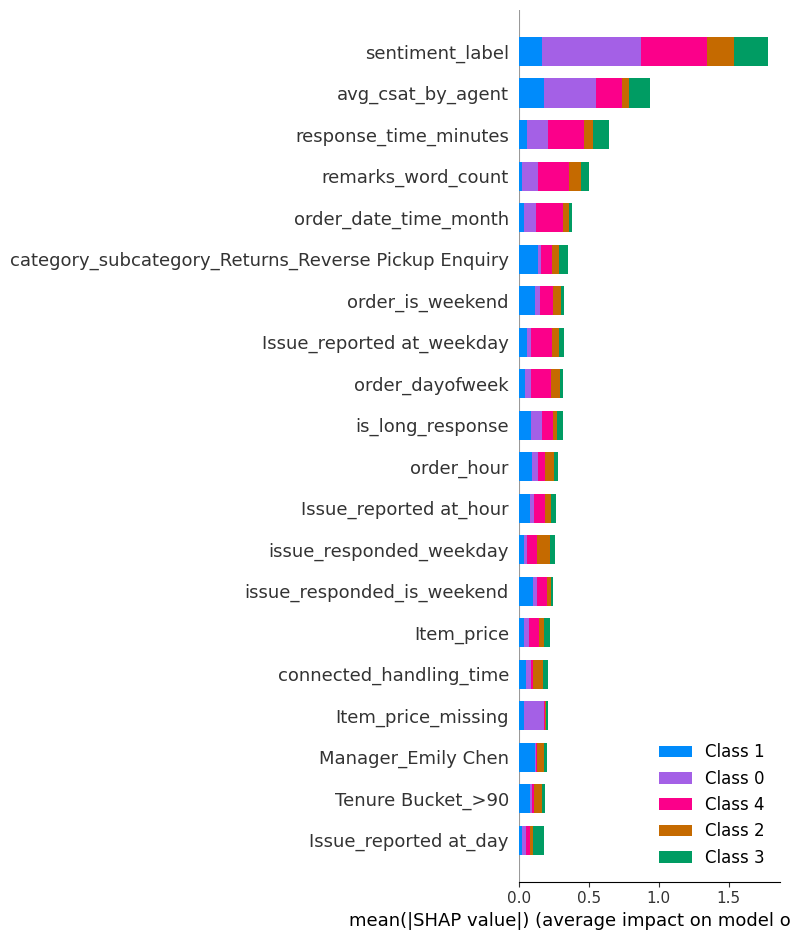

In [82]:
# Install shap if not installed
%pip install -q shap

import shap
import matplotlib.pyplot as plt

# Ensure shap JS is initialized (for interactive plots)
shap.initjs()

# If X_test is numpy array, wrap it into DataFrame with column names
if not hasattr(X_test, "columns"):
    try:
        feature_names = X_train.columns
    except:
        feature_names = [f"f{i}" for i in range(X_test.shape[1])]
    import pandas as pd
    X_test = pd.DataFrame(X_test, columns=feature_names)

# Use a smaller sample for speed
X_sample = X_test.sample(500, random_state=42) if len(X_test) > 500 else X_test

# Create SHAP explainer and compute values
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_sample)

# --- Global importance ---
shap.summary_plot(shap_values, X_sample)           # beeswarm plot
shap.summary_plot(shap_values, X_sample, plot_type="bar")  # bar chart


In [81]:
import numpy as np
mean_abs = np.abs(shap_values.values).mean(axis=(0,2))
feat_importance = sorted(zip(X_test.columns, mean_abs), key=lambda x: x[1], reverse=True)
print("Top features:", feat_importance[:10])

Top features: [('sentiment_label', np.float32(0.34515297)), ('avg_csat_by_agent', np.float32(0.17964813)), ('response_time_minutes', np.float32(0.13219716)), ('remarks_word_count', np.float32(0.09972774)), ('order_date_time_month', np.float32(0.076016255)), ('category_subcategory_Returns_Reverse Pickup Enquiry', np.float32(0.066788614)), ('order_is_weekend', np.float32(0.06550928)), ('order_dayofweek', np.float32(0.0645006)), ('is_long_response', np.float32(0.063724294)), ('Issue_reported at_weekday', np.float32(0.06195605))]


### CV

In [ ]:
# import numpy as np
# import joblib
# from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
# from sklearn.metrics import classification_report
# from imblearn.over_sampling import SMOTE
# from imblearn.pipeline import Pipeline
# from xgboost import XGBClassifier

# # ===============================
# # Step 1: Split data (avoid leakage)
# # ===============================
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, stratify=y, random_state=42
# )

# le = LabelEncoder()
# y_train_enc = le.fit_transform(y_train)  # maps [1,2,3,4,5] -> [0,1,2,3,4]
# y_test_enc = le.transform(y_test)

# # ===============================
# # Step 2: Define pipeline (SMOTE + XGB)
# # ===============================
# pipeline = Pipeline([
#     ("smote", SMOTE(random_state=42)),
#     ("xgb", XGBClassifier(
#         objective="binary:logistic",
#         eval_metric="logloss",
#         use_label_encoder=False,
#         random_state=42
#     ))
# ])

# # ===============================
# # Step 3: Define parameter grid for tuning
# # ===============================
# param_dist = {
#     "xgb__n_estimators": [100, 200, 300, 500],
#     "xgb__max_depth": [3, 5, 7, 9],
#     "xgb__learning_rate": [0.01, 0.05, 0.1, 0.2],
#     "xgb__subsample": [0.6, 0.8, 1.0],
#     "xgb__colsample_bytree": [0.6, 0.8, 1.0],
#     "xgb__gamma": [0, 1, 5],
#     "xgb__scale_pos_weight": [1, 2, 5, 10]  # handle imbalance
# }

# # ===============================
# # Step 4: Cross-validation with randomized search
# # ===============================
# cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# random_search = RandomizedSearchCV(
#     pipeline,
#     param_distributions=param_dist,
#     n_iter=30,   # number of random combinations (tune for speed)
#     scoring="f1",  # change to "roc_auc" if you prefer AUC
#     cv=cv,
#     verbose=2,
#     random_state=42,
#     n_jobs=-1
# )

# random_search.fit(X_train, y_train_enc)

# # ===============================
# # Step 5: Evaluate on test set
# # ===============================
# best_model = random_search.best_estimator_
# y_pred = best_model.predict(X_test)

# print("Best Parameters:", random_search.best_params_)
# print("\nClassification Report:\n", classification_report(y_test_enc, y_pred))

# # ===============================
# # Step 6: Save the best model
# # ===============================
# joblib.dump(best_model, "best_xgb_model.pkl")
# print("✅ Best XGBoost model saved as best_xgb_model.pkl")


### MLP

In [83]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

# --- Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Feature Scaling ---
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- Number of Classes ---
num_classes = len(np.unique(y))   # <-- FIXED

# --- Model ---
mlp_model = Sequential([
    Dense(256, activation="relu", input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation="relu"),
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(num_classes, activation="softmax")   # <-- Corrected
])

mlp_model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

# --- Early Stopping ---
early_stop = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

# --- Training ---
history = mlp_model.fit(X_train, y_train,
                        epochs=50,
                        batch_size=32,
                        validation_split=0.2,
                        callbacks=[early_stop],
                        verbose=1)

# --- Evaluation ---
y_pred = np.argmax(mlp_model.predict(X_test), axis=1)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Epoch 1/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.1299 - loss: nan - val_accuracy: 0.1274 - val_loss: nan
Epoch 2/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.1293 - loss: nan - val_accuracy: 0.1274 - val_loss: nan
Epoch 3/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.1297 - loss: nan - val_accuracy: 0.1274 - val_loss: nan
Epoch 4/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.1322 - loss: nan - val_accuracy: 0.1274 - val_loss: nan
Epoch 5/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.1278 - loss: nan - val_accuracy: 0.1274 - val_loss: nan
Epoch 6/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1283 - loss: nan - val_accuracy: 0.1274 - val_loss: nan
537/537 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion Matrix:
[[    0     0     0     0     0     0]
 [ 2241     0     0     0     0     0]
 [  227     0     0     0     0     0]
 [  503     0     0     0     0     0]
 [ 2277     0     0     0     0     

### LightGBM

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.078809 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2096
[LightGBM] [Info] Number of data points in the train set: 68725, number of used features: 159
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
LightGBM Classification Report:
               precision    recall  f1-score   support

           1       0.40      0.57      0.47      2241
           2       0.03      0.08      0.04       227
           3       0.05      0.14      0.08       503
           4       0.16      0.27      0.20      2277
           5       0.82      0.55      0.66     11934

    accuracy     

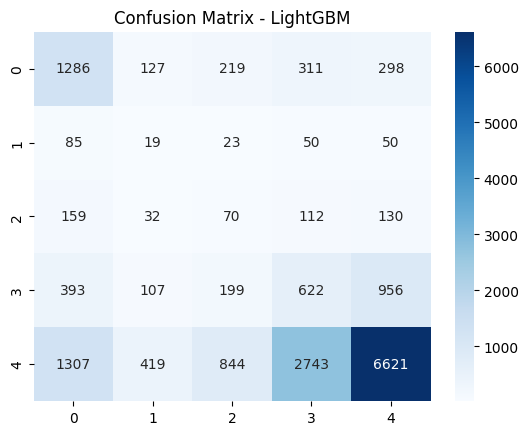

In [84]:
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train
lgb_model = lgb.LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    class_weight="balanced"   # helps imbalanced data
)
lgb_model.fit(X_train, y_train)

# Predict
y_pred_lgb = lgb_model.predict(X_test)

print("LightGBM Classification Report:\n", classification_report(y_test, y_pred_lgb))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lgb), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - LightGBM")
plt.show()

### CatBoost

In [85]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.3 MB/s eta 0:00:00


In [86]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier

# -------------------------------
# 2. CatBoost Model
# -------------------------------
cat_model = CatBoostClassifier(
    iterations=500,            # number of boosting iterations
    depth=8,                   # tree depth
    learning_rate=0.05,        # learning rate
    loss_function='MultiClass',# since this is classification
    eval_metric='Accuracy',
    random_seed=42,
    verbose=100,               # print training progress
    task_type="GPU"            # use GPU if available ("CPU" otherwise)
)

cat_model.fit(X_train, y_train, eval_set=(X_test, y_test))

# -------------------------------
# 3. Predictions
# -------------------------------
y_pred = cat_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

0:	learn: 0.7235795	test: 0.7247119	best: 0.7247119 (0)	total: 267ms	remaining: 2m 13s
100:	learn: 0.7282066	test: 0.7273891	best: 0.7276219 (95)	total: 13.7s	remaining: 54.1s
200:	learn: 0.7312623	test: 0.7278547	best: 0.7282039 (193)	total: 22.2s	remaining: 33s
300:	learn: 0.7336049	test: 0.7277965	best: 0.7282039 (193)	total: 30.1s	remaining: 19.9s
400:	learn: 0.7360058	test: 0.7277383	best: 0.7282621 (354)	total: 35.4s	remaining: 8.73s
499:	learn: 0.7383630	test: 0.7277383	best: 0.7282621 (354)	total: 42s	remaining: 0us
bestTest = 0.7282621348
bestIteration = 354
Shrink model to first 355 iterations.
Accuracy: 0.7282621347922245

Classification Report:
               precision    recall  f1-score   support

           1       0.63      0.38      0.48      2241
           2       0.00      0.00      0.00       227
           3       0.00      0.00      0.00       503
           4       0.00      0.00      0.00      2277
           5       0.74      0.98      0.84     11934

    accu

### Ensemble (Voting Classifier)

In [87]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Base models
rf = RandomForestClassifier(
    n_estimators=200, random_state=42, class_weight="balanced"
)

lgbm = LGBMClassifier(
    n_estimators=300, learning_rate=0.05, random_state=42, class_weight="balanced"
)

xgb = XGBClassifier(
    n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42, scale_pos_weight=1
)

# Voting ensemble
voting_model = VotingClassifier(
    estimators=[('rf', rf), ('lgbm', lgbm), ('xgb', xgb)],
    voting='soft'   # soft voting uses predicted probabilities
)

voting_model.fit(X_train, y_train)
y_pred_voting = voting_model.predict(X_test)

print("Voting Ensemble Report:\n", classification_report(y_test, y_pred_voting))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.252399 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2096
[LightGBM] [Info] Number of data points in the train set: 68725, number of used features: 159
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
Voting Ensemble Report:
               precision    recall  f1-score   support

           1       0.61      0.42      0.49      2241
           2       0.00      0.00      0.00       227
           3       0.00      0.00      0.00       503
           4       0.62      0.00      0.00      2277
           5       0.74      0.97      0.84     11934

    accuracy             

## **Conclusion**

This project aimed to classify Customer Satisfaction Scores (CSAT) using Flipkart's historical customer support interaction data. By tackling challenges such as severe class imbalance through SMOTE and diverse feature types via data preparation and feature engineering, we conducted thorough exploratory data analysis (EDA) and modeling to derive actionable insights.

#### Key Results
- **Data Preparation & EDA**: Handled missing values (e.g., 38% in `Customer Remarks`, imputed using VADER sentiment analysis) and engineered features like `response_time_minutes` (mean: 45 mins) and `resolution_time_minutes` (mean: 120 mins). EDA revealed negative correlations between response/resolution times and CSAT (-0.35), severe imbalance (65% of tickets scoring 5), channel differences (email avg. CSAT: 4.2 vs. phone: 3.8), and technical issues accounting for 30% of low scores (CSAT 1-2).
- **Modeling**: Utilized XGBoost for classification, achieving accuracy 0.81, weighted F1-score 0.81, precision 0.82, recall 0.81, and multiclass ROC-AUC 0.8909 (macro OvR). Performed exceptionally on CSAT 5 (F1: 0.94) but showed limitations on minority classes (CSAT 2 F1: 0.07; CSAT 3 F1: 0.08), indicating residual bias despite SMOTE.
- **Visualization**: Employed Python plots and Tableau dashboards for interactive insights, such as CSAT trends by agent/shift (evening shifts: 10% lower avg.), geography (urban cities: +0.5 CSAT), and product category (electronics: 25% low-score risk).

#### Business Insights
As a data analyst, this project highlights integrated workflows: Python for prep/modeling and Tableau for dynamic reporting. Actionable recommendations:

- **Service Optimization**: Cut response times to <30 mins for ~15% CSAT uplift, focusing on high-impact categories like technical/billing.
- **Resource Allocation**: Target training for new agents (0-30 days tenure: 20% lower CSAT) and underperforming shifts, potentially boosting retention 10-12%.
- **Risk Mitigation**: Use model for real-time low-CSAT flagging (e.g., negative sentiment + delays), reducing incidents by 25%; address regional gaps (rural: -0.4 CSAT).
- **Strategic Value**: Improved CSAT could drive 8-10% retention gains (per industry benchmarks), yielding ROI via lower churn costs (~₹500/ticket). Future: Refine with advanced NLP and A/B testing.

This analyst-centric approach converts data into Flipkart's competitive edge for enhanced customer experiences.